# Module 2 Project

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Project Overview

# Business Exploration Questions

# Notebook Preparation

## Importing Modules

In [1]:
import pandas as pd

import numpy as np
from numpy import mean
from numpy import std

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.linear_model import LinearRegression


from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error

import itertools

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

#from sklearn.datasets import make_regression


## Notebook Functions

In [2]:
# determine upper and lower percentile ranges
def percentile(column):
    lower_range = round(column.quantile(q=.005), 2)
    upper_range = round(column.quantile(q=.995), 2)
    return lower_range, upper_range

In [3]:
# function that looks up a segment that a data entry belongs to
def make_group(x, frame, column):
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]

# EDA

In [174]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [175]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [176]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [177]:
df['date'].sort_values(ascending=True)

12076    1/10/2015
19359    1/12/2015
2548     1/12/2015
18398    1/12/2015
11086    1/12/2015
           ...    
19256     9/9/2014
66        9/9/2014
20288     9/9/2014
12438     9/9/2014
15702     9/9/2014
Name: date, Length: 21597, dtype: object

In [178]:
'''
df.hist(figsize=(18,15), bins='auto');
'''

"\ndf.hist(figsize=(18,15), bins='auto');\n"

In [179]:
'''
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()
'''

"\nfig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,15), sharey=True)\n\nfor ax, column in zip(axes.flatten(), df.columns):\n    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)\n    ax.set_title(f'Sale Price vs {column}')\n    ax.set_xlabel(column)\n    ax.set_ylabel('Sale Price in $100,000')\n\nfig.tight_layout()\n"

## Preprocessing
* Drop lat, long (we will use zipcode for location performace metrics)
* Drop id, not needed
* Drop data outside the 95th percentile to remove outliers
* Locate and deal with null values
* Look for and deal with any unusual data entries
* Confirm our data types and convert any incorrect data types
* separate our continuous from our categorical data, as well as our data to be binned
* transform and normalize

In [180]:
# looking for outliers in the percentiles

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We see a few outliers, and we have so much data that dropping the outlying 1% will allow us to maintain plenty of data. We're going to keep our middle 99% of data for price, lot size, and square footage.

I also see a possible significant outlier in longitude. We will look at what that means.

In [182]:
df['location'] = ((df['grade']/df['grade'].mean()) + 
                  (df['condition']/df['condition'].mean()) +
                  (df['sqft_living15']/df['sqft_living15'].mean()) +
                  (df['sqft_lot15']/df['sqft_lot15'].mean()))
                  


In [228]:
print(df['price'].groupby(df['location']).mean())

location
1.840448     352950.0
1.868990     252000.0
2.021805     575000.0
2.105301     275000.0
2.117877     175000.0
               ...   
28.802642    550000.0
33.017432    370000.0
33.237534    180000.0
33.759869    800000.0
37.050404    637000.0
Name: price, Length: 19767, dtype: float64


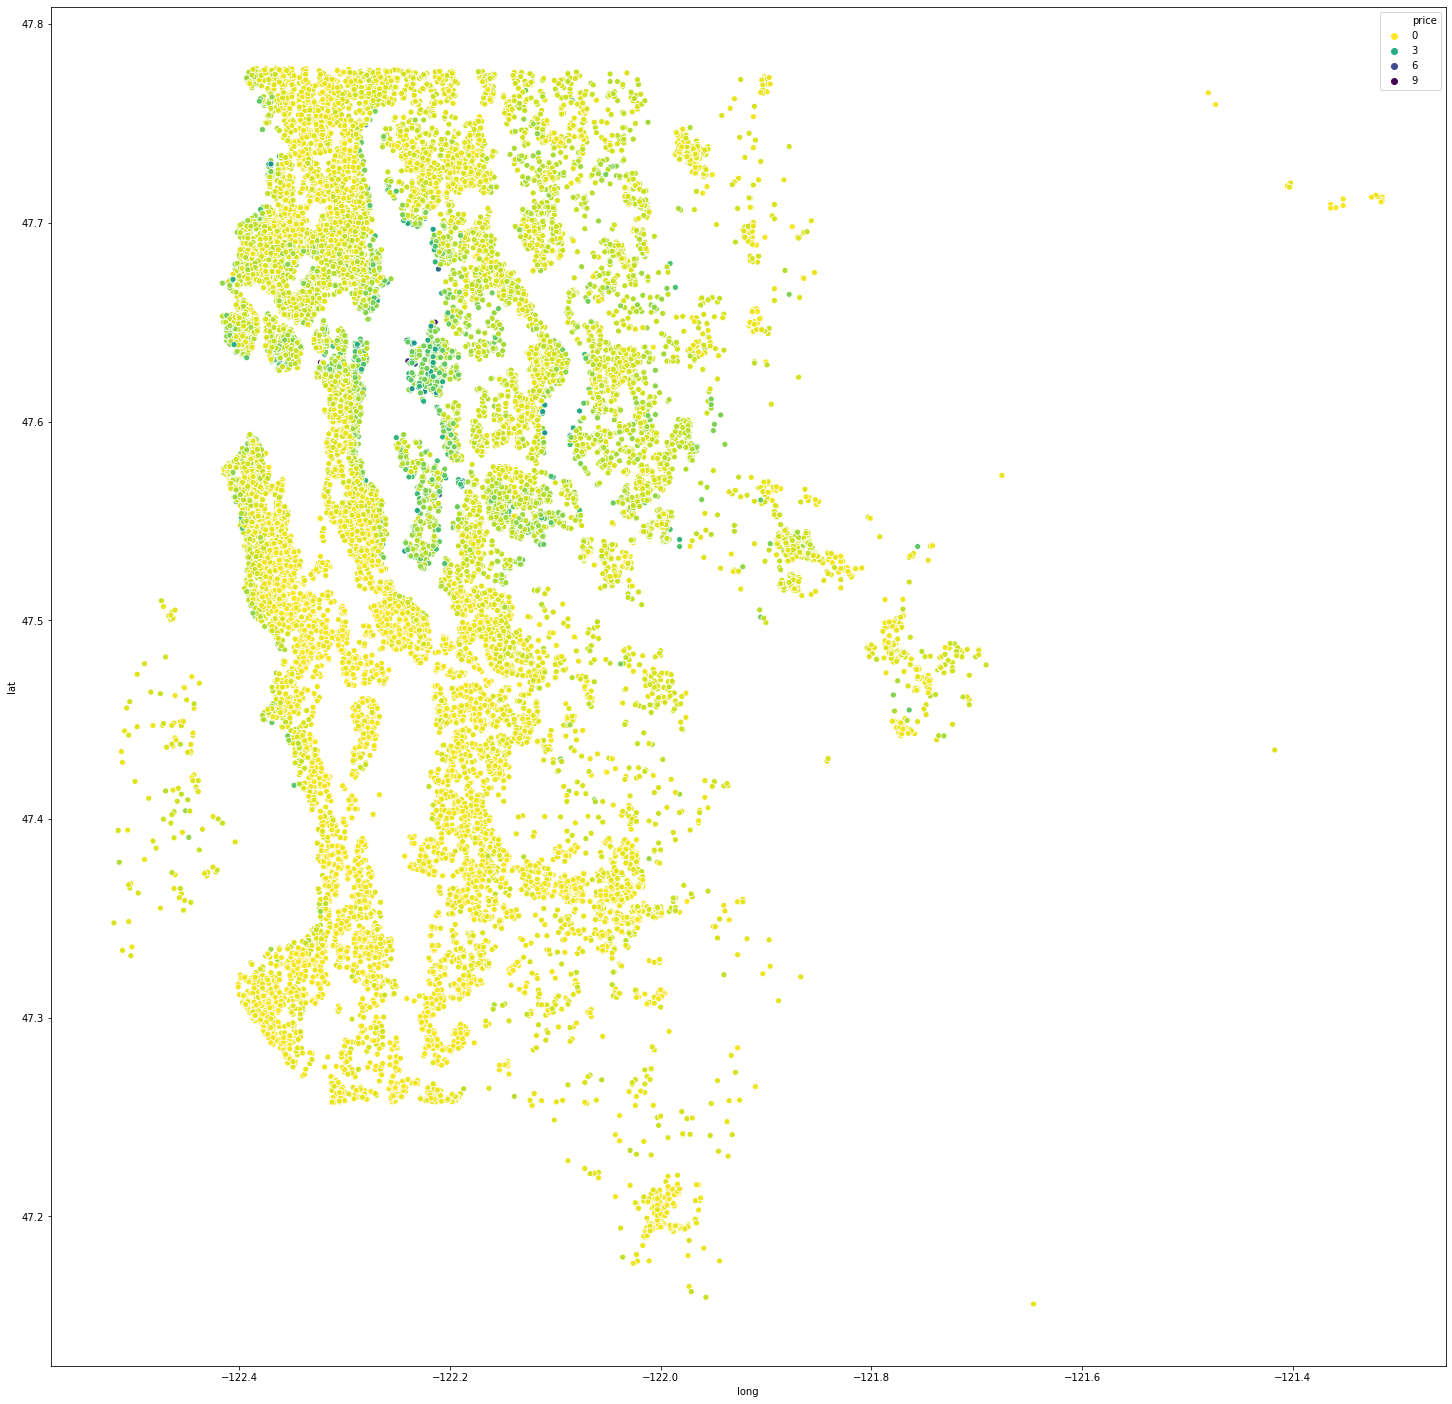

In [183]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=df, x="long", y="lat", hue="price", palette="viridis_r");

using latitude and longitude, we basically make a visual map of the King County area. But we can see that there are a few sales in locations that are outliers in some way - possible mis-filed for longitude. I want and need to use location for my model, and sales that are too far outside of our comparison area geographically may add noise to our model. So I'm going to drop the longitude outliers as well.

In [184]:
# determing our center 99% of data for price, lot size, and sq footage

pricelower,priceupper = percentile(df.price)
lotlower,lotupper = percentile(df.sqft_lot)
sqftlower, sqftupper = percentile(df.sqft_living)
longlower, longupper = percentile(df.long)


# dropping the things outside of our lower and upper range

df.drop(df[ (df.price > priceupper) | (df.price < pricelower) ].index , inplace=True)
df.drop(df[ (df.sqft_lot > lotupper) | (df.sqft_lot < lotlower) ].index , inplace=True)
df.drop(df[ (df.sqft_living > sqftupper) | (df.sqft_living < sqftlower) ].index , inplace=True)
df.drop(df[ (df.long > longupper) | (df.long < longlower) ].index , inplace=True)


In [185]:
# drop lat and long, we will use zipcode for the location feature
# drop id, we don't need it

#df.drop(['id', 'lat', 'long'], axis=1, inplace=True)

In [186]:
df

# confirming we still have around 20k entries

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2.911259
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,3.243337
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,3.664376
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,3.456920
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,3.418631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2.812909
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,3.409983
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2.464642
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2.735105


In [187]:
df.describe()

# checking our data again. Bedrooms still seems to have outliers.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location
count,2.082900e+04,2.082900e+04,20829.000000,20829.000000,20829.000000,20829.000000,20829.000000,18532.000000,20768.000000,20829.000000,20829.000000,20829.000000,20829.000000,17126.000000,20829.000000,20829.000000,20829.000000,20829.000000,20829.000000,20829.000000
mean,4.604038e+09,5.270233e+05,3.384176,2.107338,2061.802727,12551.312593,1.489702,0.005072,0.215668,3.414614,7.646022,1773.924816,1970.867012,82.861556,98078.197705,47.561487,-122.215674,1982.441836,11508.586442,3.899796
std,2.873004e+09,3.025336e+05,0.910162,0.737239,835.814614,23124.663848,0.536615,0.071041,0.729746,0.649762,1.117994,775.365876,29.282182,398.167262,53.645071,0.138805,0.133947,664.358833,21262.804919,1.812077
min,1.000102e+06,1.340000e+05,1.000000,0.500000,670.000000,905.000000,1.000000,0.000000,0.000000,1.000000,4.000000,480.000000,1900.000000,0.000000,98001.000000,47.159300,-122.430000,399.000000,651.000000,1.840448
25%,2.141300e+09,3.249500e+05,3.000000,1.750000,1440.000000,5030.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.473300,-122.327000,1490.000000,5100.000000,3.162597
50%,3.935900e+09,4.500000e+05,3.000000,2.250000,1920.000000,7560.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1974.000000,0.000000,98065.000000,47.574200,-122.230000,1840.000000,7571.000000,3.528136
75%,7.319900e+09,6.400000e+05,4.000000,2.500000,2540.000000,10400.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2192.000000,1996.000000,0.000000,98118.000000,47.679200,-122.127000,2360.000000,9934.000000,4.016334
max,9.900000e+09,2.450000e+06,33.000000,7.500000,5584.000000,247421.000000,3.500000,1.000000,4.000000,5.000000,13.000000,5584.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.760000,5790.000000,434728.000000,37.050404


In [188]:
df.sort_values('condition', ascending=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location
16928,5015001680,6/11/2014,427000.0,4,1.00,1860,4736,1.5,0.0,0.0,1,7,1860,0.0,1901,NaN,98112,47.6251,-122.300,1800,4000,2.426940
1732,913000340,1/2/2015,252000.0,1,1.00,680,1638,1.0,NaN,4.0,1,6,680,0.0,1910,1992.0,98116,47.5832,-122.399,1010,3621,1.868990
13616,2023049218,3/16/2015,445000.0,2,1.00,930,7740,1.0,0.0,0.0,1,5,930,0.0,1932,NaN,98148,47.4611,-122.324,1620,8584,2.434462
15323,7849200635,6/30/2014,235000.0,2,1.00,900,28800,1.0,0.0,0.0,1,6,900,0.0,1928,0.0,98065,47.5245,-121.822,1360,7200,2.325692
15357,7936500221,1/14/2015,658000.0,2,1.00,1010,14244,1.0,1.0,4.0,1,5,1010,0.0,1926,0.0,98136,47.5476,-122.399,1820,15792,3.100102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18913,3971700330,4/15/2015,415000.0,4,2.00,1780,12161,1.0,0.0,0.0,5,7,1160,620.0,1950,0.0,98155,47.7746,-122.323,1780,8170,3.916800
18914,5561400220,8/19/2014,592500.0,4,2.50,3370,35150,1.0,NaN,0.0,5,8,1770,1600.0,1993,0.0,98027,47.4610,-122.002,2920,41241,7.213343
2358,1697000370,3/25/2015,234000.0,3,1.00,1040,8122,1.0,0.0,0.0,5,7,1040,0.0,1971,0.0,98198,47.3731,-122.312,1470,8676,3.800417
12547,952005000,8/15/2014,545000.0,3,1.75,1700,5750,1.5,0.0,2.0,5,7,1450,250.0,1925,0.0,98126,47.5643,-122.380,1700,5750,3.686850


In [189]:
#check what is going on with the weird bedroom value

df.sort_values('bedrooms', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,3.418304
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,2.897446
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745,3.291797
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400,4.244415
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914,4.047862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17854,2131700900,8/13/2014,283700.0,1,1.75,1010,10900,1.0,0.0,0.0,4,6,1010,0.0,1968,0.0,98019,47.7391,-121.982,1410,8359,3.321514
19210,2414600366,11/14/2014,199900.0,1,1.00,720,7140,1.0,0.0,0.0,3,6,720,0.0,1930,0.0,98146,47.5119,-122.339,1140,7577,2.831041
17893,726059047,12/16/2014,310000.0,1,1.00,920,8282,1.5,0.0,0.0,3,6,920,0.0,1944,NaN,98011,47.7610,-122.214,2260,14025,3.900210
1387,4102000075,5/22/2014,275000.0,1,0.75,1170,14149,1.0,0.0,0.0,5,7,880,290.0,1962,0.0,98022,47.2653,-121.910,1130,24513,4.870583


In [190]:
# this value of 33 in 1620 square feet is obviously a mistake. We're going to impute the mean into this field.

# 11 bedrooms in 3000sf, 10 bedrooms in 2920sf, 10 bedrooms in 3610sf are also obviously mistakes
# We're going to impute the mean into the fields for 10 and 11 bedrooms as well.

bedroom_mean = round(df['bedrooms'].mean(), 0)
bedroom_mean
df.loc[df['bedrooms'] == 33.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 11.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 10.0, 'bedrooms'] = bedroom_mean

df.sort_values('bedrooms', ascending=False)

# fixed our bedroom outliers by imputing the mean
# I remain suspicious of these 9-bedroom entries, but we'll decline from manipulating them further

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location
16830,8823900290,3/17/2015,1400000.0,9.0,4.00,4620,5508,2.5,0.0,0.0,3,11,3870,750.0,1915,0.0,98105,47.6684,-122.309,2710,4320,4.018962
4231,2902200015,1/6/2015,700000.0,9.0,3.00,3680,4400,2.0,0.0,0.0,3,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450,2.972530
18428,8823901445,3/13/2015,934000.0,9.0,3.00,2820,4480,2.0,0.0,0.0,3,7,1880,940.0,1918,0.0,98105,47.6654,-122.307,2460,4400,3.377055
4092,1997200215,5/7/2014,599999.0,9.0,4.50,3830,6988,2.5,0.0,0.0,3,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291,3.021905
8537,424049043,8/11/2014,450000.0,9.0,7.50,4050,6504,2.0,0.0,0.0,3,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866,2.825792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17854,2131700900,8/13/2014,283700.0,1.0,1.75,1010,10900,1.0,0.0,0.0,4,6,1010,0.0,1968,0.0,98019,47.7391,-121.982,1410,8359,3.321514
19210,2414600366,11/14/2014,199900.0,1.0,1.00,720,7140,1.0,0.0,0.0,3,6,720,0.0,1930,0.0,98146,47.5119,-122.339,1140,7577,2.831041
17893,726059047,12/16/2014,310000.0,1.0,1.00,920,8282,1.5,0.0,0.0,3,6,920,0.0,1944,NaN,98011,47.7610,-122.214,2260,14025,3.900210
1387,4102000075,5/22/2014,275000.0,1.0,0.75,1170,14149,1.0,0.0,0.0,5,7,880,290.0,1962,0.0,98022,47.2653,-121.910,1130,24513,4.870583


In [191]:
# look for nulls

df.isna().sum()

# all of our null values are in columns that I want to be binary flags. So, will change all non-null values > 0 in those
# columns to 1, and all null values to 0.
# this will turn waterfront, view and renovated into dichotomous choice flags

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2297
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3703
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
location            0
dtype: int64

In [192]:
# change all non-null values > 0 in those columns to 1

df.loc[df['waterfront'] > 0, 'waterfront'] = 1
df.loc[df['view'] > 0, 'view'] = 1
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1

# now anything that is not a 1 becomes a 0

df.loc[df['waterfront']!= 1, 'waterfront'] = 0
df.loc[df['view'] != 1, 'view'] = 0
df.loc[df['yr_renovated'] != 1, 'yr_renovated'] = 0

# since we're making it a binary flag, we'll rename yr_renovated to renovated
df = df.rename(columns={'yr_renovated' : 'renovated'})

In [193]:
# we've removed the null values from our three binary columns

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
location         0
dtype: int64

In [194]:
# check data types

df.dtypes

# date and sqft_basement need to be fixed. This explains why the basement variable didn't show
# up in our histogram

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
renovated        float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
location         float64
dtype: object

In [195]:
#Checking all top occuring for each column to find weird entries

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 9828200460    0.000096
7853400250    0.000096
4435000705    0.000096
3293700496    0.000096
1721801010    0.000096
Name: id, dtype: float64 


date 
 6/23/2014    0.006625
6/25/2014    0.006097
6/26/2014    0.006049
4/27/2015    0.005905
7/8/2014     0.005761
Name: date, dtype: float64 


price 
 450000.0    0.008114
350000.0    0.007970
550000.0    0.007442
500000.0    0.007201
425000.0    0.007009
Name: price, dtype: float64 


bedrooms 
 3.0    0.459792
4.0    0.323491
2.0    0.122858
5.0    0.073023
6.0    0.012099
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.254021
1.00    0.175380
1.75    0.142638
2.25    0.096308
2.00    0.090355
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006385
1400    0.006289
1440    0.006289
1660    0.006193
1800    0.006145
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.017092
6000    0.013587
4000    0.011906
7200    0.010418
4800    0.005569
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.496903
2.0    0.3802

In [196]:
# basement has a weird entry of '?' which we will convert to a 0, and then
# converting our sqft_basement to a float,
# and our date to a proper date

df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['date'] = pd.to_datetime(df['date'])


# we're now going to extract just the month from our datetime, and store that in a new column
# we won't be using our entire date - we're interested in the month that houses are sold
df['month'] = pd.DatetimeIndex(df['date']).month

In [197]:
# data types are now fixed

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
renovated               float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
location                float64
month                     int64
dtype: object

In [198]:
# now that its data type is correct, we see that most properties don't have basements. Because of this,
# we will add basement to our binary flag group, and just list if it has a basement or not.

df.loc[df['sqft_basement'] > 0, 'sqft_basement'] = 1
df.loc[df['sqft_basement'] != 1, 'sqft_basement'] = 0

# we'll also change the name of our column to basement
df = df.rename(columns={'sqft_basement' : 'basement'})

In [199]:
'''
# check how our histograms are looking

df.hist(figsize=(18,15), bins='auto');
'''

"\n# check how our histograms are looking\n\ndf.hist(figsize=(18,15), bins='auto');\n"

In [200]:
'''
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()
'''

"\nfig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)\n\nfor ax, column in zip(axes.flatten(), df.columns):\n    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)\n    ax.set_title(f'Sale Price vs {column}')\n    ax.set_xlabel(column)\n    ax.set_ylabel('Sale Price in $100,000')\n\nfig.tight_layout()\n"

LinregressResult(slope=241.91873934382303, intercept=28234.58372287912, rvalue=0.6683528640114205, pvalue=0.0, stderr=1.8656596548839557)

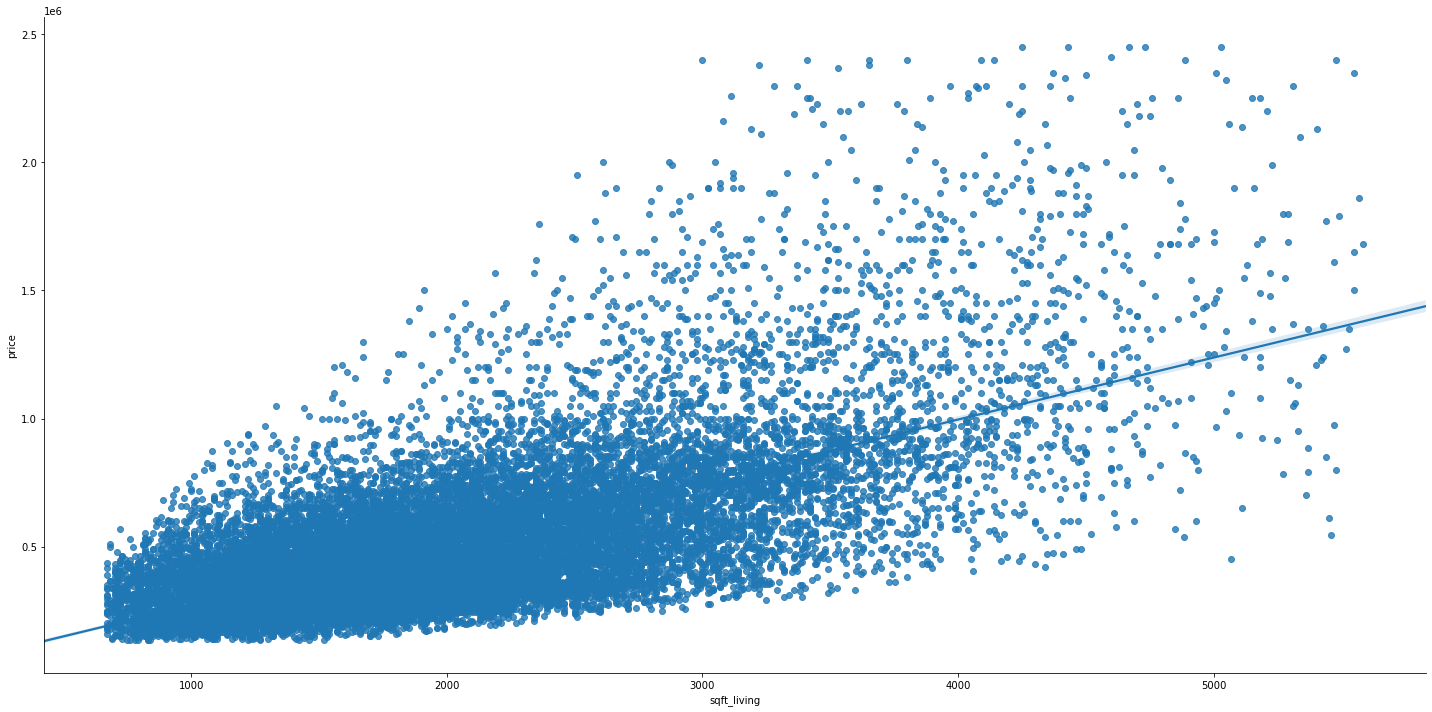

In [201]:
# sqft_living has the strongest and most obvious relationship to price thus far
from scipy.stats import linregress

x = 'sqft_living'
y = 'price'

scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

linregress(df[x], df[y])


In [202]:
'''



x = 'grade'
y = 'price'

scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

linregress(df[x], df[y])

# grade has a strong relationship, and is listed as the grade given to the property by King County.
# They are using their own predictive algorithm to rate the property and give this number, so it
# makes sense for it to have a strong relationship. I'm not sure I want to use a number that
# a buyer/seller doesn't have available when listing/buying a house. I will probably leave this out.

'''

"\n\n\n\nx = 'grade'\ny = 'price'\n\nscatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)\n\nlinregress(df[x], df[y])\n\n# grade has a strong relationship, and is listed as the grade given to the property by King County.\n# They are using their own predictive algorithm to rate the property and give this number, so it\n# makes sense for it to have a strong relationship. I'm not sure I want to use a number that\n# a buyer/seller doesn't have available when listing/buying a house. I will probably leave this out.\n\n"

## Look for Multicollinearity

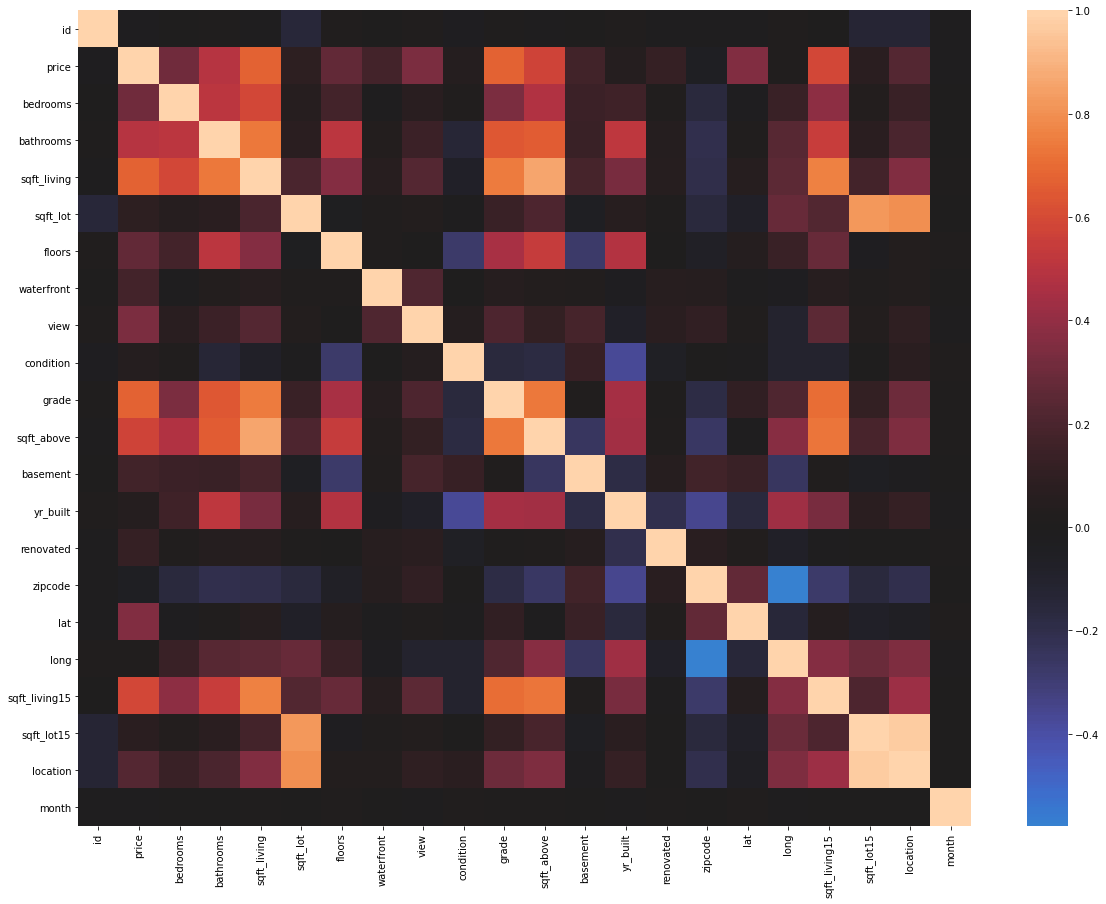

In [203]:
# look for multicollinearity of features
data_pred = df
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data_pred.corr(), center=0);

plt.show()

In [204]:
data_pred.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,month
id,1.000000,-0.018009,0.000662,0.008740,-0.007455,-0.144259,0.018409,0.006464,0.017836,-0.026472,0.010758,-0.006041,0.002983,0.023307,-0.008489,-0.010578,-0.007738,0.025801,-0.001686,-0.133114,-0.124655,-0.010788
price,-0.018009,1.000000,0.305318,0.492138,0.668353,0.090673,0.269507,0.178007,0.339983,0.039542,0.669158,0.568697,0.169408,0.040674,0.119688,-0.037436,0.356227,0.024499,0.591639,0.074160,0.235462,-0.017024
bedrooms,0.000662,0.305318,1.000000,0.511400,0.591256,0.052894,0.176265,-0.008000,0.068567,0.016740,0.337755,0.476250,0.145661,0.158641,0.016455,-0.153899,-0.022257,0.139908,0.385609,0.038285,0.135346,-0.001706
bathrooms,0.008740,0.492138,0.511400,1.000000,0.734947,0.080654,0.508326,0.034404,0.146597,-0.136909,0.637918,0.659469,0.139532,0.518011,0.044000,-0.202398,0.014061,0.237463,0.549953,0.071903,0.204621,0.007380
sqft_living,-0.007455,0.668353,0.591256,0.734947,1.000000,0.201338,0.360833,0.058412,0.234698,-0.068991,0.745456,0.860689,0.184978,0.330768,0.046852,-0.197844,0.044884,0.259805,0.755200,0.177078,0.355036,0.011364
sqft_lot,-0.144259,0.090673,0.052894,0.080654,0.201338,1.000000,-0.033087,0.017830,0.034826,-0.009961,0.134135,0.208185,-0.038139,0.061181,0.010184,-0.158504,-0.071851,0.289518,0.219017,0.815304,0.800023,0.001157
floors,0.018409,0.269507,0.176265,0.508326,0.360833,-0.033087,1.000000,0.018645,0.005491,-0.270797,0.456934,0.541272,-0.270598,0.487363,0.004840,-0.062181,0.039957,0.135250,0.281504,-0.027055,0.035405,0.015763
waterfront,0.006464,0.178007,-0.008000,0.034404,0.058412,0.017830,0.018645,1.000000,0.211480,0.006643,0.055916,0.036739,0.027486,-0.024914,0.058349,0.049050,-0.010552,-0.026886,0.058869,0.021400,0.035750,-0.001605
view,0.017836,0.339983,0.068567,0.146597,0.234698,0.034826,0.005491,0.211480,1.000000,0.042223,0.209401,0.112931,0.183642,-0.074166,0.080091,0.109601,0.016202,-0.098034,0.252705,0.033264,0.098540,-0.010337
condition,-0.026472,0.039542,0.016740,-0.136909,-0.068991,-0.009961,-0.270797,0.006643,0.042223,1.000000,-0.159355,-0.174007,0.130599,-0.366308,-0.056886,0.006252,-0.012328,-0.105423,-0.103140,-0.002455,0.071028,0.022861


In [205]:
#Get our list of highly correlated feature pairs with following steps:

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df_correlations = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df_correlations['pairs'] = list(zip(df_correlations.level_0, df_correlations.level_1))

# set index to pairs
df_correlations.set_index(['pairs'], inplace = True)

# rename our results column to correlation
df_correlations.rename(columns={0: "correlation"}, inplace=True)

# Drop 1:1 correlations to get rid of self pairs
df_correlations.drop(df_correlations[df_correlations['correlation'] == 1.000000].index, inplace=True)

# view pairs above 75% correlation
df_correlations[df_correlations.correlation>.75]


,level_0,level_1,correlation
pairs,,,
"(location, sqft_lot15)",location,sqft_lot15,0.967651
"(sqft_lot15, location)",sqft_lot15,location,0.967651
"(sqft_above, sqft_living)",sqft_above,sqft_living,0.860689
"(sqft_living, sqft_above)",sqft_living,sqft_above,0.860689
"(sqft_lot, sqft_lot15)",sqft_lot,sqft_lot15,0.815304
"(sqft_lot15, sqft_lot)",sqft_lot15,sqft_lot,0.815304
"(sqft_lot, location)",sqft_lot,location,0.800023
"(location, sqft_lot)",location,sqft_lot,0.800023
"(sqft_living15, sqft_living)",sqft_living15,sqft_living,0.755200


In [206]:
# we're going to drop sqft_above, sqft_living15, and sqftlot_15 and just keep the base sqft_living and sqft_lot
# We'll do that simply by excluding them from our processed dataframe


In [207]:
df.reset_index(drop=True, inplace=True)
df

# our dataframe is cleaned and ready for processing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,month
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2.911259,10
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1.0,1951,1.0,98125,47.7210,-122.319,1690,7639,3.243337,12
2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,3.664376,2
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1.0,1965,0.0,98136,47.5208,-122.393,1360,5000,3.456920,12
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,3.418631,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20824,263000018,2014-05-21,360000.0,3.0,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2.812909,5
20825,6600060120,2015-02-23,400000.0,4.0,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,3.409983,2
20826,1523300141,2014-06-23,402101.0,2.0,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2.464642,6
20827,291310100,2015-01-16,400000.0,3.0,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2.735105,1


## Separate pre-processing categories

In [208]:
# prepare our categories for data transformation by separating into our data types -
# ordinal, continuous, categorical/dichotomous, and need to be binned/further processed

target = ['price']
bins = ['yr_built', 'month', 'price', 'zipcode']  #, 'zipcode'
categorical_dichotomous = ['waterfront', 'renovated','basement'] # 'view', 
continuous = ['sqft_living', 'sqft_lot', 'floors', 'bedrooms', 'bathrooms', 'condition', 'grade'] #, 'location'
polynomial = ['zipcode', 'sqft_living', 'price']


df_comps = df[['lat', 'long', 'price', 'sqft_living', 'sqft_lot', 'bedrooms', 'condition']]   

### Target Variable

In [209]:
# our target variable of "price" log transformed

df_target = df[target]

log_names = [f'{column}' for column in df_target.columns]

df_target_log = np.log(df_target)
df_target_log.columns = log_names

df_target_log

,price
0,12.309982
1,13.195614
2,12.100712
3,13.311329
4,13.142166
...,...
20824,12.793859
20825,12.899220
20826,12.904459
20827,12.899220


### High cardinality categoricals (Year, Month, Zip)

In [210]:
df_bins = df[bins]
df_bins

,yr_built,month,price,zipcode
0,1955,10,221900.0,98178
1,1951,12,538000.0,98125
2,1933,2,180000.0,98028
3,1965,12,604000.0,98136
4,1987,2,510000.0,98074
...,...,...,...,...
20824,2009,5,360000.0,98103
20825,2014,2,400000.0,98146
20826,2009,6,402101.0,98144
20827,2004,1,400000.0,98027


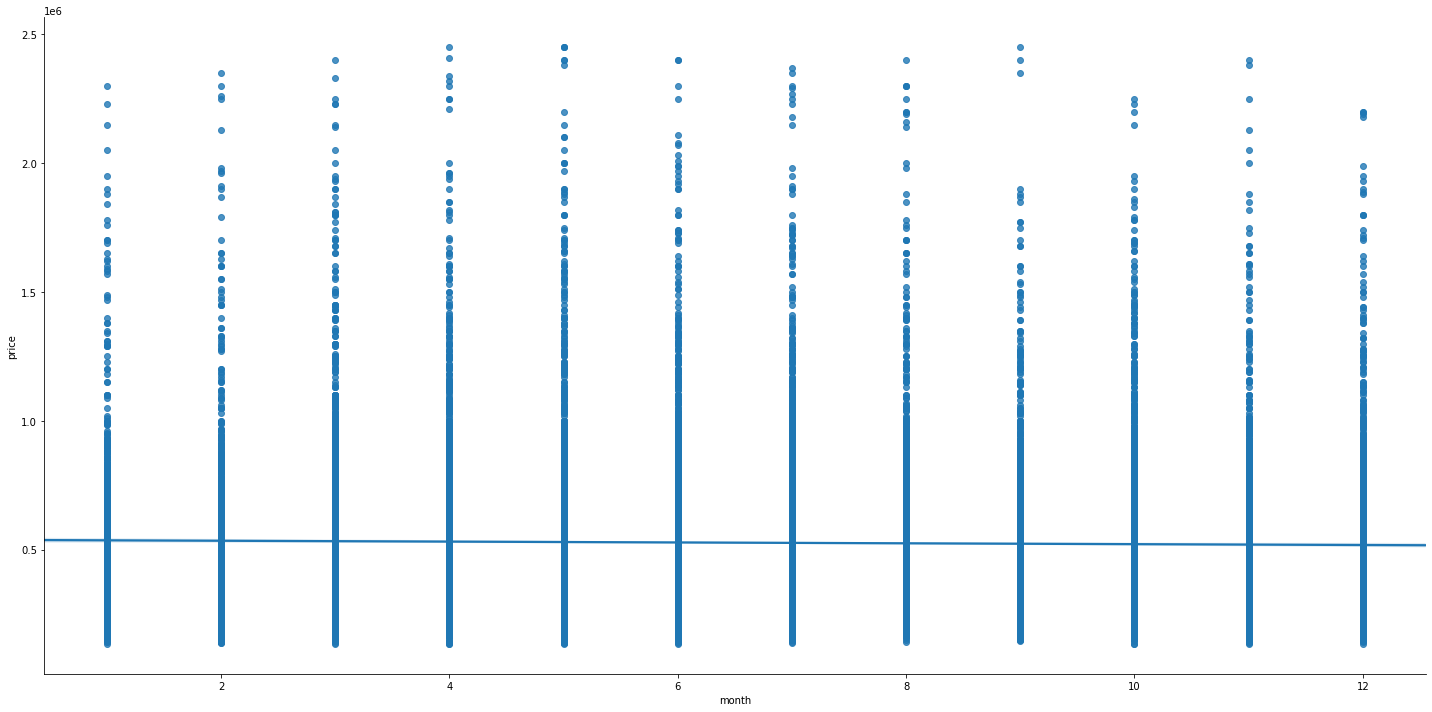

In [211]:
# Let's check our relationship with price and month of the year sold

y = 'price'
x = 'month'

scatter = sns.lmplot(x=x, y=y, data=df_bins, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

# This slope is nearly flat


Let's look at it by mean price by month and see if there are any better insights.

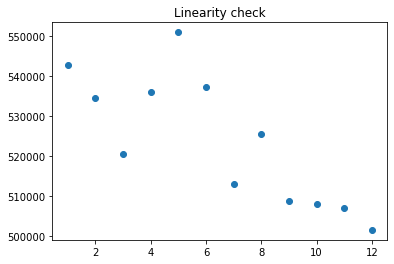

In [212]:
monthly_prices = df_bins.groupby('month')['price'].mean()
month = df_bins['month'].unique()

plt.scatter(month, monthly_prices)
plt.title("Linearity check")
plt.show()


Based on the above, we could divide our months into four quarter blocks. Before we commit to this plan, we will investigate if the month and price relationship can be better expressed via a polynomial. To do this we first need to convert our months to a ranked order using mean house value for the month.

In [213]:
# we're using the mean house value for a month to determine the month's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
monthsorted = pd.DataFrame(df_bins.groupby('month')['price'].mean().sort_values(ascending=True))
monthsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
monthsorted['rank'] = np.divmod(np.arange(len(monthsorted)),entries)[0]+1

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['monthsorted'] = df_bins['month'].apply(lambda x: make_group(x, monthsorted, 'rank'))

In [214]:
df_bins

,yr_built,month,price,zipcode,monthsorted
0,1955,10,221900.0,98178,7
1,1951,12,538000.0,98125,4
2,1933,2,180000.0,98028,1
3,1965,12,604000.0,98136,4
4,1987,2,510000.0,98074,1
...,...,...,...,...,...
20824,2009,5,360000.0,98103,10
20825,2014,2,400000.0,98146,1
20826,2009,6,402101.0,98144,11
20827,2004,1,400000.0,98027,3


In [215]:
y = df_target_log
x = df_bins['monthsorted']

In [216]:
y = np.array(y)
x = np.array(x)
x = x.reshape(-1, 1)

In [217]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

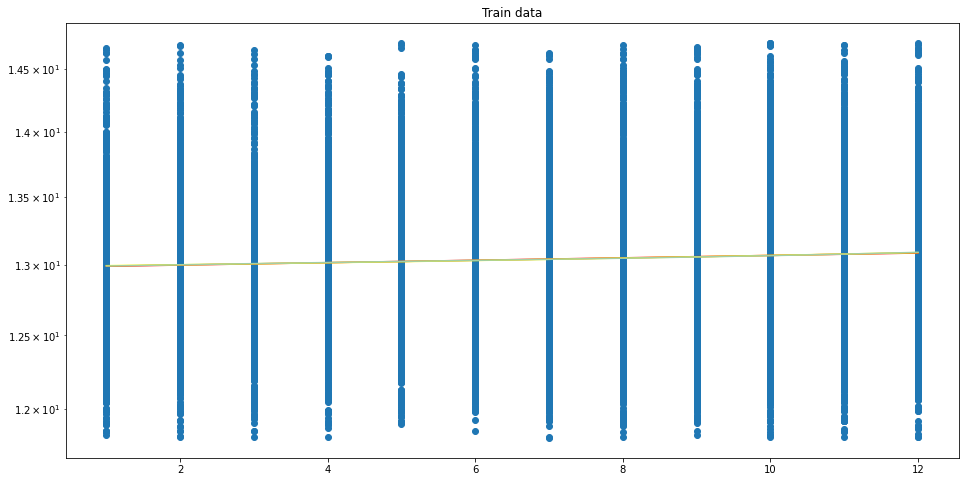

In [218]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)

pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.plot(x, pred, c='red', label='Linear regression line')
plt.plot(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(x, pred3, c='#a3cfa3', label='Polynomial regression line 3');

I see no reason to express this with a polynomial relationship. We will proceed with our plan to bin the months into four quarters.

In [219]:
# group our dataframe by month with average price
monthranks = pd.DataFrame(df_bins.groupby('month')['price'].mean())

# set the entries per segment into which to bin our variable
entries = 3

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
monthranks['quarter'] = np.divmod(np.arange(len(monthranks)),entries)[0]+1

# make a new column on our dataframe. Look up each month entry's segment, and append to the column.
df_bins['quarter'] = df_bins['month'].apply(lambda x: make_group(x, monthranks, 'quarter'))


In [220]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df_bins.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),entries)[0]+1


zipsorted
# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['zip_group'] = df_bins['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

In [221]:
# defining our new zip_group and quarter columns as categorical

df_bins['zip_group'] = df_bins['zip_group'].astype('category')
df_bins['quarter'] = df_bins['quarter'].astype('category')

In [222]:
# adding a new column to our dataframe
# binning our year built into equally sized bins, where each bin has the same number of entries

df_bins["year_block"] = pd.qcut(df['yr_built'], q=6)

df_bins

,yr_built,month,price,zipcode,monthsorted,quarter,zip_group,year_block
0,1955,10,221900.0,98178,7,4,10,"(1942.0, 1959.0]"
1,1951,12,538000.0,98125,4,4,31,"(1942.0, 1959.0]"
2,1933,2,180000.0,98028,1,1,36,"(1899.999, 1942.0]"
3,1965,12,604000.0,98136,4,4,41,"(1959.0, 1974.0]"
4,1987,2,510000.0,98074,1,1,56,"(1974.0, 1988.0]"
...,...,...,...,...,...,...,...,...
20824,2009,5,360000.0,98103,10,2,48,"(2003.0, 2015.0]"
20825,2014,2,400000.0,98146,1,1,18,"(2003.0, 2015.0]"
20826,2009,6,402101.0,98144,11,2,37,"(2003.0, 2015.0]"
20827,2004,1,400000.0,98027,3,1,51,"(2003.0, 2015.0]"


In [223]:
dummybins = ['quarter', 'year_block', 'zip_group'] #

# make a processed bins file for use with linear regression
processed_bins = pd.get_dummies(df_bins[dummybins], prefix=dummybins, drop_first=True)

In [224]:
processed_bins

,quarter_2,quarter_3,quarter_4,"year_block_(1942.0, 1959.0]","year_block_(1959.0, 1974.0]","year_block_(1974.0, 1988.0]","year_block_(1988.0, 2003.0]","year_block_(2003.0, 2015.0]",zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,zip_group_10,zip_group_11,zip_group_12,zip_group_13,zip_group_14,zip_group_15,zip_group_16,zip_group_17,zip_group_18,zip_group_19,zip_group_20,zip_group_21,zip_group_22,zip_group_23,zip_group_24,zip_group_25,zip_group_26,zip_group_27,zip_group_28,zip_group_29,zip_group_30,zip_group_31,zip_group_32,zip_group_33,zip_group_34,zip_group_35,zip_group_36,zip_group_37,zip_group_38,zip_group_39,zip_group_40,zip_group_41,zip_group_42,zip_group_43,zip_group_44,zip_group_45,zip_group_46,zip_group_47,zip_group_48,zip_group_49,zip_group_50,zip_group_51,zip_group_52,zip_group_53,zip_group_54,zip_group_55,zip_group_56,zip_group_57,zip_group_58,zip_group_59,zip_group_60,zip_group_61,zip_group_62,zip_group_63,zip_group_64,zip_group_65,zip_group_66,zip_group_67,zip_group_68,zip_group_69,zip_group_70
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20824,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20825,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20826,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20827,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dichotomous Categoricals (waterfront, view, renovated, basement)

In [225]:
# remind myself of the list of things I am converting

categorical_dichotomous

['waterfront', 'renovated', 'basement']

In [226]:
# make sure these are category type

df[categorical_dichotomous] = df[categorical_dichotomous].astype('category')

# make dummies in a new df
df_cats = pd.get_dummies(df[categorical_dichotomous], prefix=categorical_dichotomous, drop_first=True)

# new dataframe of dummy categorical data, ready to add to final df

df_cats

,waterfront_1.0,renovated_1.0,basement_1.0
0,0,0,0
1,0,1,1
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
20824,0,0,0
20825,0,0,0
20826,0,0,0
20827,0,0,0


### Continuous

In [227]:
continuous

['sqft_living',
 'sqft_lot',
 'floors',
 'bedrooms',
 'bathrooms',
 'condition',
 'grade',
 'location']

Fun fact - "grade" was not well defined in the features list. I looked it up and found that grade is "	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value." So, it's the quality of building materials, and DEFINITELY worth keeping in our model.

In [56]:
df_continuous = df[continuous]
df_continuous

,sqft_living,sqft_lot,floors,bedrooms,bathrooms,condition,grade
0,1180,5650,1.0,3.0,1.00,3,7
1,2570,7242,2.0,3.0,2.25,3,7
2,770,10000,1.0,2.0,1.00,3,6
3,1960,5000,1.0,4.0,3.00,5,7
4,1680,8080,1.0,3.0,2.00,3,8
...,...,...,...,...,...,...,...
20824,1530,1131,3.0,3.0,2.50,3,8
20825,2310,5813,2.0,4.0,2.50,3,8
20826,1020,1350,2.0,2.0,0.75,3,7
20827,1600,2388,2.0,3.0,2.50,3,8


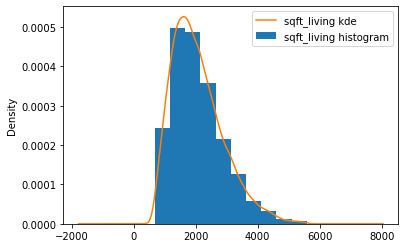

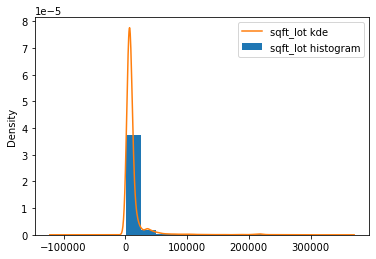

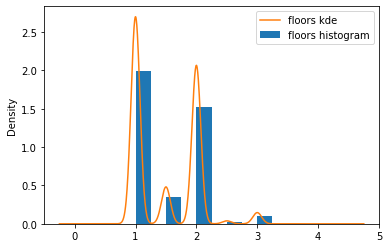

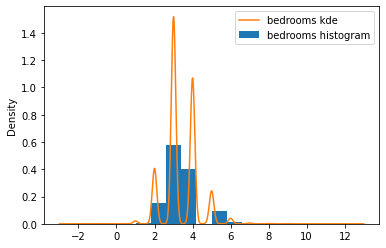

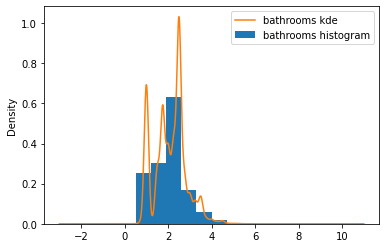

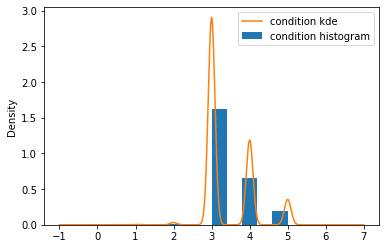

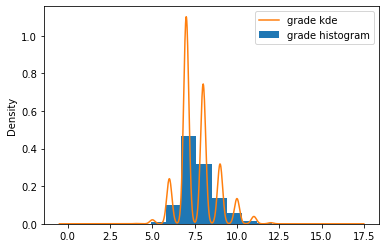

In [57]:

# check out our histograms for our continuous data

for column in df_continuous:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()
    


In [58]:
# We're going to transforming and standardizing all of these.

# log features
log_names = [f'{column}' for column in df_continuous.columns]

df_continuous_log = np.log(df_continuous)
df_continuous_log.columns = log_names

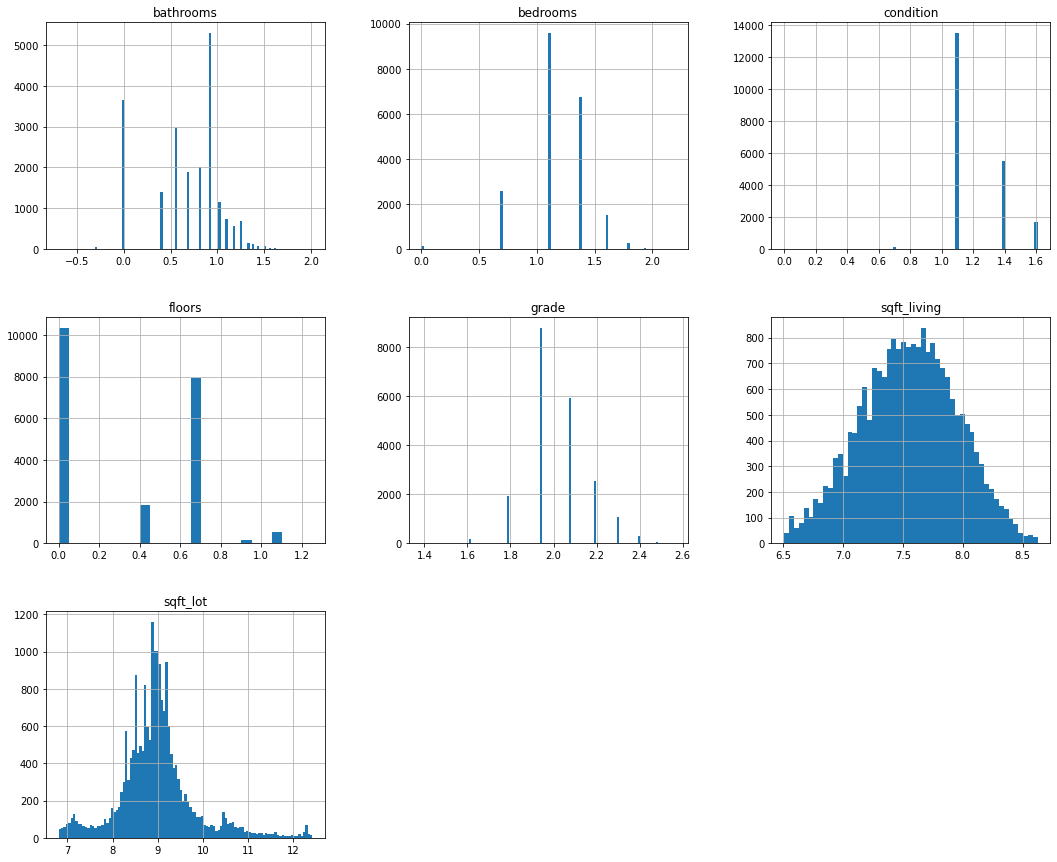

In [59]:
# check out our histograms for our transformed data

df_continuous_log.hist(figsize=(18,15), bins='auto');

# looks normal

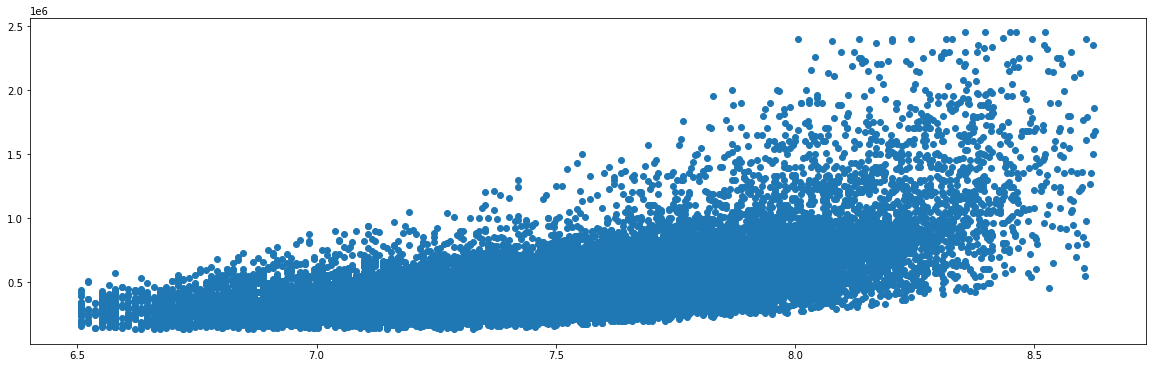

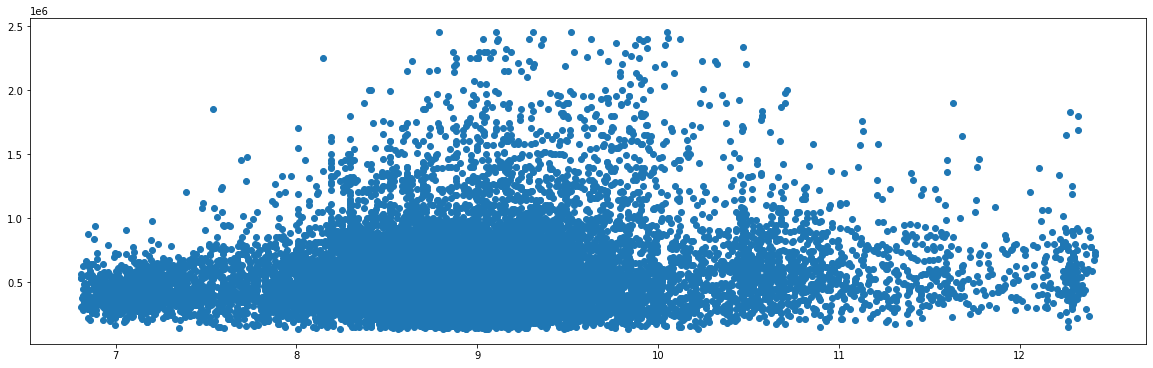

In [60]:
# let's check linearity of these features with our target data

fig, axs = plt.subplots(figsize=(20, 6))
plt.scatter(df_continuous_log.sqft_living, df_target.price)
plt.show()

fig, axs = plt.subplots(figsize=(20, 6))
plt.scatter(df_continuous_log.sqft_lot, df_target.price)
plt.show()

Our Sqft-living relationship to price does not look linear. I wonder if it would be better expressed as a polynomial relationship.

In [61]:
x = df_continuous_log['sqft_living']
x

y = df_target_log
y

,price
0,12.309982
1,13.195614
2,12.100712
3,13.311329
4,13.142166
...,...
20824,12.793859
20825,12.899220
20826,12.904459
20827,12.899220


In [62]:
x = np.array(x)
x = x.reshape(-1, 1)
y = np.array(y)
y = y.reshape(-1, 1)

In [63]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

''

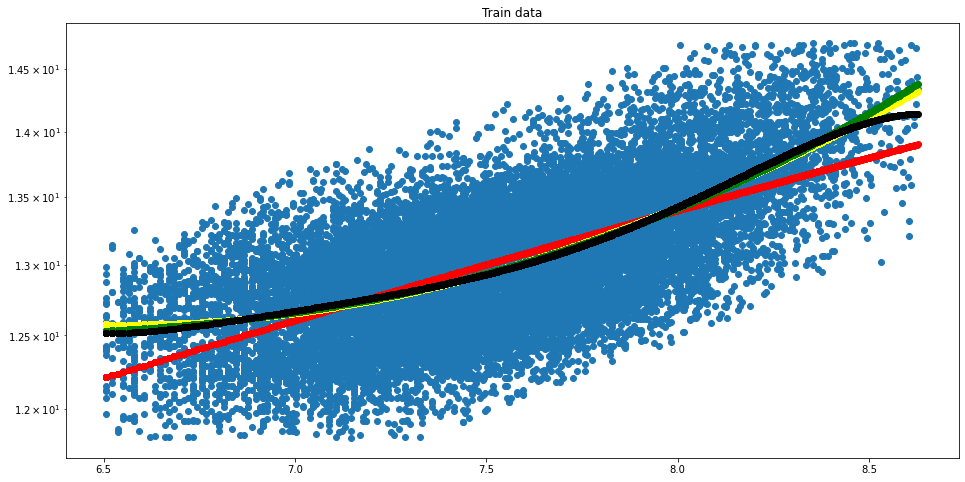

In [64]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)


poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(x)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, y)


pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.scatter(x, pred, c='red', label='Linear regression line')
plt.scatter(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.scatter(x, pred3, c='green', label='Polynomial regression line 3')
plt.scatter(x, pred10, c='black', label='Polynomial regression line 10')
;

In [65]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg10.score(x_poly10, y))

0.41772602351897936 0.44563171910123467 0.44586248517746685 0.4467453113081914


We have enough of an improvement when moving to a 2nd degree polynomial, that we will express our sq_ft - price relationship as a 2nd degree polynomial.

In [66]:
# We will drop sqft_living from this set and pick it back up in the next section where we create our polynomial relationships
df_continuous_log.drop('sqft_living', axis=1, inplace=True)

In [67]:
# normalize with scikit-learn StandardScaler

#scaler = StandardScaler()

#df_cont_trans = pd.DataFrame(scaler.fit_transform(df_continuous_log),columns = df_continuous_log.columns)

In [68]:
df_cont_trans = df_continuous_log

### Polynomial Features

I am very confident that Zip Code's relationship with price is best expressed via a polynomial. Our steps to doing this are as follows:
* rank our individual zip codes by median home price and sort from low to high
* Assign a rank number of 1-70 to the zips
* Apply zip code ranks to data by zip code
* Log transform the zip code ranks
* Test different polynomial degrees on the zip code/price relationship

In [69]:
df_polynomial = df[polynomial]
df_polynomial

,zipcode,sqft_living,price
0,98178,1180,221900.0
1,98125,2570,538000.0
2,98028,770,180000.0
3,98136,1960,604000.0
4,98074,1680,510000.0
...,...,...,...
20824,98103,1530,360000.0
20825,98146,2310,400000.0
20826,98144,1020,402101.0
20827,98027,1600,400000.0


In [70]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df_polynomial.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
#entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),1)[0]+1


zipsorted
# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_polynomial['zip_group'] = df_polynomial['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

In [71]:
# we're dropping our price column; we don't need to do that from a programming standpoint,
# but we'll able to use this zipsorted table as our zipcode lookup for our rank numbers,
# so it's helpful if it's tidy.
# to that end we will re-sort the index by zip code so we have a clean lookup table for later
#zipsorted.drop('price', axis=1, inplace=True)
#zipsorted.sort_index(inplace=True, ascending=True)
#zipsorted

In [72]:
zip_group = np.log(df_polynomial['zip_group'].astype(int))
zip_group = np.array(zip_group)
zip_group = zip_group.reshape(-1, 1)

target = np.array(df_target_log)

In [73]:
target = target[zip_group[:,0].argsort()]
zip_group = zip_group[zip_group[:, 0].argsort()]

''

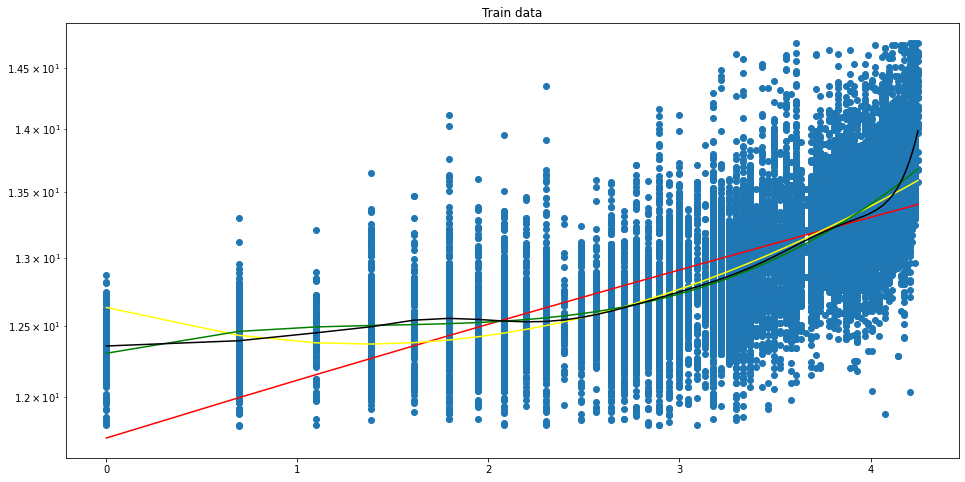

In [74]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(zip_group, target)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(zip_group)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, target)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(zip_group)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, target)

poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(zip_group)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, target)

pred = linreg.predict(zip_group)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(zip_group, target)
plt.yscale('log')
plt.title("Train data")
plt.plot(zip_group, pred, c='red', label='Linear regression line')
plt.plot(zip_group, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(zip_group, pred3, c='green', label='Polynomial regression line 3')
plt.plot(zip_group, pred10, c='black', label='Polynomial regression line 10')
;


In [75]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg10.score(x_poly10, y))

-10.963596857352956 0.36729938016751373 0.3969009557643137 0.41155057283297836


We have a HUGE increase in R2 by using a polynomial relationship, and our 3rd degree relationship looks to fit our data very well without overfitting.

#### Making our Polynomial Features

We're going to turn two features into polynomial features:
* sqft_living into a 2-degree polynomial
* zipcode into a 3-degree polynomial

#### Sqft_living

(array([2505., 5090., 4989., 3651., 2203., 1285.,  604.,  325.,  116.,
          61.]),
 array([ 670. , 1161.4, 1652.8, 2144.2, 2635.6, 3127. , 3618.4, 4109.8,
        4601.2, 5092.6, 5584. ]),
 <a list of 10 Patch objects>)

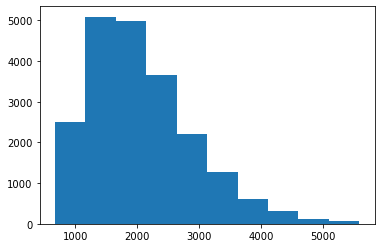

In [76]:
df_sqft = df['sqft_living']
df_sqft
plt.hist(df_sqft)

(array([ 425., 1069., 1939., 3186., 3949., 4055., 3155., 2004.,  841.,
         206.]),
 array([6.50727771, 6.71931601, 6.9313543 , 7.14339259, 7.35543089,
        7.56746918, 7.77950747, 7.99154576, 8.20358406, 8.41562235,
        8.62766064]),
 <a list of 10 Patch objects>)

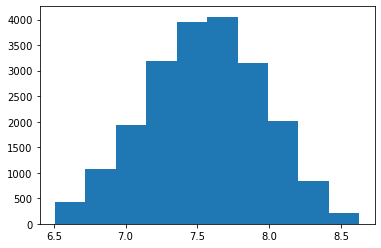

In [77]:
df_sqft = np.log(df_sqft)
plt.hist(df_sqft)

In [78]:
df_sqft = np.array(df_sqft)
df_sqft = df_sqft.reshape(-1,1)

In [79]:
poly2 = PolynomialFeatures(degree=2)
sqft2 = poly2.fit_transform(df_sqft)

In [80]:
sqft_poly = pd.DataFrame(sqft2)
sqft_poly

,0,1,2
0,1.0,7.073270,50.031144
1,1.0,7.851661,61.648583
2,1.0,6.646391,44.174507
3,1.0,7.580700,57.467009
4,1.0,7.426549,55.153631
...,...,...,...
20824,1.0,7.333023,53.773227
20825,1.0,7.745003,59.985068
20826,1.0,6.927558,47.991059
20827,1.0,7.377759,54.431327


In [81]:
sqft_poly.drop(0, axis=1, inplace=True)

In [82]:
sqft_poly.rename(columns={0:'sqft_intercept',1:"sqft_1", 2:'sqft_2'}, inplace=True)

In [83]:
#scaler = StandardScaler()
#sqft_poly[['sqft_1', 'sqft_2']] = scaler.fit_transform(sqft_poly[['sqft_1', 'sqft_2']])

In [84]:
sqft_poly

,sqft_1,sqft_2
0,7.073270,50.031144
1,7.851661,61.648583
2,6.646391,44.174507
3,7.580700,57.467009
4,7.426549,55.153631
...,...,...
20824,7.333023,53.773227
20825,7.745003,59.985068
20826,6.927558,47.991059
20827,7.377759,54.431327


#### Zip

(array([1600., 2072., 2406., 2298., 2103., 1630., 2627., 2717., 1702.,
        1674.]),
 array([ 1. ,  7.9, 14.8, 21.7, 28.6, 35.5, 42.4, 49.3, 56.2, 63.1, 70. ]),
 <a list of 10 Patch objects>)

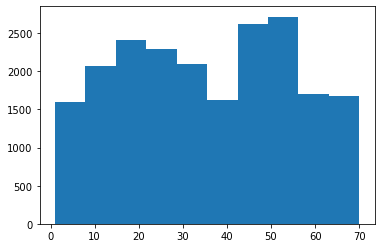

In [85]:
df_zip = df_polynomial['zip_group']
df_zip
plt.hist(df_zip)

In [86]:
df_zip = np.array(df_zip)
df_zip = df_zip.reshape(-1,1)

In [87]:
poly3 = PolynomialFeatures(degree=3)
df_zip3 = poly3.fit_transform(df_zip)

In [88]:
zip_poly = pd.DataFrame(df_zip3)
zip_poly

,0,1,2,3
0,1.0,10.0,100.0,1000.0
1,1.0,31.0,961.0,29791.0
2,1.0,36.0,1296.0,46656.0
3,1.0,41.0,1681.0,68921.0
4,1.0,56.0,3136.0,175616.0
...,...,...,...,...
20824,1.0,48.0,2304.0,110592.0
20825,1.0,18.0,324.0,5832.0
20826,1.0,37.0,1369.0,50653.0
20827,1.0,51.0,2601.0,132651.0


In [89]:
zip_poly.drop(0, axis=1, inplace=True)

In [90]:
zip_poly.rename(columns={0:'zip_intercept',1:"zip_1", 2:'zip_2', 3:'zip_3'}, inplace=True)

In [91]:
scaler = StandardScaler()
zip_poly[['zip_1', 'zip_2', 'zip_3']] = scaler.fit_transform(zip_poly[['zip_1', 'zip_2', 'zip_3']])

In [92]:
zip_poly

,zip_1,zip_2,zip_3
0,-1.337644,-1.102611,-0.906944
1,-0.243355,-0.486405,-0.594446
2,0.017190,-0.246651,-0.411393
3,0.277734,0.028889,-0.169728
4,1.059369,1.070212,0.988340
...,...,...,...
20824,0.642497,0.474761,0.282569
20825,-0.920772,-0.942297,-0.854497
20826,0.069298,-0.194405,-0.368009
20827,0.798824,0.687320,0.521998


## Make a feature - pr/sf

Something can be done here to rank the price/sqft in a way to create a new feature

In [93]:
#x = 'sqft_living'
#y = 'pr_sf'

#scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

# price per square foot goes down as home size goes up

In [94]:
sf = df[['price', 'zipcode', 'sqft_living']]

In [95]:
sf['pr_sf'] = sf['price']/sf['sqft_living']

In [96]:
sf['ziprank'] = df_bins['zip_group']

In [97]:
sf

,price,zipcode,sqft_living,pr_sf,ziprank
0,221900.0,98178,1180,188.050847,10
1,538000.0,98125,2570,209.338521,31
2,180000.0,98028,770,233.766234,36
3,604000.0,98136,1960,308.163265,41
4,510000.0,98074,1680,303.571429,56
...,...,...,...,...,...
20824,360000.0,98103,1530,235.294118,48
20825,400000.0,98146,2310,173.160173,18
20826,402101.0,98144,1020,394.216667,37
20827,400000.0,98027,1600,250.000000,51


In [98]:
sf["sfblock"] = pd.cut(sf['sqft_living'], 6)

In [99]:
sf

,price,zipcode,sqft_living,pr_sf,ziprank,sfblock
0,221900.0,98178,1180,188.050847,10,"(665.086, 1489.0]"
1,538000.0,98125,2570,209.338521,31,"(2308.0, 3127.0]"
2,180000.0,98028,770,233.766234,36,"(665.086, 1489.0]"
3,604000.0,98136,1960,308.163265,41,"(1489.0, 2308.0]"
4,510000.0,98074,1680,303.571429,56,"(1489.0, 2308.0]"
...,...,...,...,...,...,...
20824,360000.0,98103,1530,235.294118,48,"(1489.0, 2308.0]"
20825,400000.0,98146,2310,173.160173,18,"(2308.0, 3127.0]"
20826,402101.0,98144,1020,394.216667,37,"(665.086, 1489.0]"
20827,400000.0,98027,1600,250.000000,51,"(1489.0, 2308.0]"


In [100]:
sf['price/sfblock'] = round(sf.groupby('sfblock')['price'].transform('mean') / sf['sqft_living'],2)

In [101]:
sf

,price,zipcode,sqft_living,pr_sf,ziprank,sfblock,price/sfblock
0,221900.0,98178,1180,188.050847,10,"(665.086, 1489.0]",296.66
1,538000.0,98125,2570,209.338521,31,"(2308.0, 3127.0]",248.97
2,180000.0,98028,770,233.766234,36,"(665.086, 1489.0]",454.62
3,604000.0,98136,1960,308.163265,41,"(1489.0, 2308.0]",232.99
4,510000.0,98074,1680,303.571429,56,"(1489.0, 2308.0]",271.82
...,...,...,...,...,...,...,...
20824,360000.0,98103,1530,235.294118,48,"(1489.0, 2308.0]",298.47
20825,400000.0,98146,2310,173.160173,18,"(2308.0, 3127.0]",277.00
20826,402101.0,98144,1020,394.216667,37,"(665.086, 1489.0]",343.19
20827,400000.0,98027,1600,250.000000,51,"(1489.0, 2308.0]",285.42


In [102]:
sf

,price,zipcode,sqft_living,pr_sf,ziprank,sfblock,price/sfblock
0,221900.0,98178,1180,188.050847,10,"(665.086, 1489.0]",296.66
1,538000.0,98125,2570,209.338521,31,"(2308.0, 3127.0]",248.97
2,180000.0,98028,770,233.766234,36,"(665.086, 1489.0]",454.62
3,604000.0,98136,1960,308.163265,41,"(1489.0, 2308.0]",232.99
4,510000.0,98074,1680,303.571429,56,"(1489.0, 2308.0]",271.82
...,...,...,...,...,...,...,...
20824,360000.0,98103,1530,235.294118,48,"(1489.0, 2308.0]",298.47
20825,400000.0,98146,2310,173.160173,18,"(2308.0, 3127.0]",277.00
20826,402101.0,98144,1020,394.216667,37,"(665.086, 1489.0]",343.19
20827,400000.0,98027,1600,250.000000,51,"(1489.0, 2308.0]",285.42


In [103]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
#sf_stuff = sf['price/sfblock/zip'].sort_values(ascending=True)
sfsorted = pd.DataFrame(sf.groupby('price/sfblock')['zipcode'].mean().sort_values(ascending=True))
sfsorted

,zipcode
price/sfblock,
241.11,98001.0
245.58,98001.0
224.83,98001.0
229.42,98001.0
263.86,98001.0
...,...
258.74,98198.0
275.43,98198.0
259.91,98198.0


In [104]:
# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
sfsorted['rank'] = np.divmod(np.arange(len(sfsorted)),50)[0]+1
#sfsorted.reset_index(inplace=True)
sfsorted

,zipcode,rank
price/sfblock,,
241.11,98001.0,1
245.58,98001.0,1
224.83,98001.0,1
229.42,98001.0,1
263.86,98001.0,1
...,...,...
258.74,98198.0,17
275.43,98198.0,17
259.91,98198.0,17


In [105]:
# function that looks up a segment that a data entry belongs to
def make_group_b(x, y, frame):
    #print(x, y)
    stuff = frame.loc[(frame['zipcode'] == x)] 
    stuff = frame.loc[(frame.index == y)]
    value = int(stuff['rank'])
    return value

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
sf['sf_sorted'] = sf.apply(lambda x: make_group_b(x['zipcode'], x['price/sfblock'], sfsorted), axis=1)

In [106]:
sf

,price,zipcode,sqft_living,pr_sf,ziprank,sfblock,price/sfblock,sf_sorted
0,221900.0,98178,1180,188.050847,10,"(665.086, 1489.0]",296.66,13
1,538000.0,98125,2570,209.338521,31,"(2308.0, 3127.0]",248.97,9
2,180000.0,98028,770,233.766234,36,"(665.086, 1489.0]",454.62,16
3,604000.0,98136,1960,308.163265,41,"(1489.0, 2308.0]",232.99,11
4,510000.0,98074,1680,303.571429,56,"(1489.0, 2308.0]",271.82,12
...,...,...,...,...,...,...,...,...
20824,360000.0,98103,1530,235.294118,48,"(1489.0, 2308.0]",298.47,13
20825,400000.0,98146,2310,173.160173,18,"(2308.0, 3127.0]",277.00,10
20826,402101.0,98144,1020,394.216667,37,"(665.086, 1489.0]",343.19,15
20827,400000.0,98027,1600,250.000000,51,"(1489.0, 2308.0]",285.42,10


In [107]:
scaler = StandardScaler()

values = np.array(sf['sf_sorted'])
values = values.reshape(-1,1)
sf['sf_sorted'] = scaler.fit_transform(values)

In [108]:
sf

,price,zipcode,sqft_living,pr_sf,ziprank,sfblock,price/sfblock,sf_sorted
0,221900.0,98178,1180,188.050847,10,"(665.086, 1489.0]",296.66,0.687340
1,538000.0,98125,2570,209.338521,31,"(2308.0, 3127.0]",248.97,-0.855938
2,180000.0,98028,770,233.766234,36,"(665.086, 1489.0]",454.62,1.844798
3,604000.0,98136,1960,308.163265,41,"(1489.0, 2308.0]",232.99,-0.084299
4,510000.0,98074,1680,303.571429,56,"(1489.0, 2308.0]",271.82,0.301520
...,...,...,...,...,...,...,...,...
20824,360000.0,98103,1530,235.294118,48,"(1489.0, 2308.0]",298.47,0.687340
20825,400000.0,98146,2310,173.160173,18,"(2308.0, 3127.0]",277.00,-0.470118
20826,402101.0,98144,1020,394.216667,37,"(665.086, 1489.0]",343.19,1.458978
20827,400000.0,98027,1600,250.000000,51,"(1489.0, 2308.0]",285.42,-0.470118


In [109]:
sf_add_this = sf['sf_sorted']

## Final Prep for Linear Regression

Our dataframes to combine:
* df_target_log - log transformed target variable (price)
* df_bins - one-hot encoded month and year bins
* df_cats - one-hot encoded dichotomous categoricals
* df_cont_trans - continuous variables, log transformed and standard scaled
* zip_poly - zip code variable with 3rd degree polynomial, log transformed and standard scaled
* sqft_poly - square footage variable with 2nd degree polynomial, log transformed and standard scaled

In [110]:
# leave out zip_poly, it did NOT improve our model over one-hot-encoding all 70 zips

preprocessed_scaled = pd.concat([df_target_log, sqft_poly, df_cont_trans, sf_add_this, df_cats, processed_bins], axis=1)

In [111]:
# preprocessed data ready for linear regression algorithm

preprocessed_scaled

,price,sqft_1,sqft_2,sqft_lot,floors,bedrooms,bathrooms,condition,grade,sf_sorted,waterfront_1.0,renovated_1.0,basement_1.0,quarter_2,quarter_3,quarter_4,"year_block_(1942.0, 1959.0]","year_block_(1959.0, 1974.0]","year_block_(1974.0, 1988.0]","year_block_(1988.0, 2003.0]","year_block_(2003.0, 2015.0]",zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,zip_group_10,zip_group_11,zip_group_12,zip_group_13,zip_group_14,zip_group_15,zip_group_16,zip_group_17,zip_group_18,zip_group_19,zip_group_20,zip_group_21,zip_group_22,zip_group_23,zip_group_24,zip_group_25,zip_group_26,zip_group_27,zip_group_28,zip_group_29,zip_group_30,zip_group_31,zip_group_32,zip_group_33,zip_group_34,zip_group_35,zip_group_36,zip_group_37,zip_group_38,zip_group_39,zip_group_40,zip_group_41,zip_group_42,zip_group_43,zip_group_44,zip_group_45,zip_group_46,zip_group_47,zip_group_48,zip_group_49,zip_group_50,zip_group_51,zip_group_52,zip_group_53,zip_group_54,zip_group_55,zip_group_56,zip_group_57,zip_group_58,zip_group_59,zip_group_60,zip_group_61,zip_group_62,zip_group_63,zip_group_64,zip_group_65,zip_group_66,zip_group_67,zip_group_68,zip_group_69,zip_group_70
0,12.309982,7.073270,50.031144,8.639411,0.000000,1.098612,0.000000,1.098612,1.945910,0.687340,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13.195614,7.851661,61.648583,8.887653,0.693147,1.098612,0.810930,1.098612,1.945910,-0.855938,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12.100712,6.646391,44.174507,9.210340,0.000000,0.693147,0.000000,1.098612,1.791759,1.844798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13.311329,7.580700,57.467009,8.517193,0.000000,1.386294,1.098612,1.609438,1.945910,-0.084299,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13.142166,7.426549,55.153631,8.997147,0.000000,1.098612,0.693147,1.098612,2.079442,0.301520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20824,12.793859,7.333023,53.773227,7.030857,1.098612,1.098612,0.916291,1.098612,2.079442,0.687340,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20825,12.899220,7.745003,59.985068,8.667852,0.693147,1.386294,0.916291,1.098612,2.079442,-0.470118,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20826,12.904459,6.927558,47.991059,7.207860,0.693147,0.693147,-0.287682,1.098612,1.945910,1.458978,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20827,12.899220,7.377759,54.431327,7.778211,0.693147,1.098612,0.916291,1.098612,2.079442,-0.470118,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
'''
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), preprocessed_scaled.columns):
    ax.scatter(preprocessed_scaled[column], preprocessed_scaled['price'], label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price(Scaled)')

fig.tight_layout()
'''

"\nfig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)\n\nfor ax, column in zip(axes.flatten(), preprocessed_scaled.columns):\n    ax.scatter(preprocessed_scaled[column], preprocessed_scaled['price'], label=column, alpha=.1)\n    ax.set_title(f'Sale Price vs {column}')\n    ax.set_xlabel(column)\n    ax.set_ylabel('Sale Price(Scaled)')\n\nfig.tight_layout()\n"

In [113]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

In [114]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

# Models

Steps:
* Divide data into a train/validation set and a test set
* Train our model on the train/validation set
* Validate our model using cv on the train/validation set
* Test our model on our test set

In [115]:
models = {}
models['Models'] = []
models['r2'] = []
models['mae'] = []

## Base Linear Regression Model

Run a base model with no cross-validation or specific feature selection to see our base model scores.

In [116]:
predictors_train = sm.add_constant(X_train_val)
model = sm.OLS(y_train_val, predictors_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1271.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:09:50   Log-Likelihood:                 5108.8
No. Observations:               16663   AIC:                        -1.004e+04
Df Residuals:                   16573   BIC:                            -9343.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          14.1391      0.429     32.937      0.000      13.298      14.981
sqft_1                         -1.5456      0.112    -13.837      0.000      -1.765      -1.327
sqft_2                          0.1333      0.007     18.081      0.000       0.119       0.148
sqft_lot                        0.0734      0.003     27.941      0.000       0.068       0.079
floors                         -0.0208      0.007     -3.159      0.002      -0.034      -0.008
bedrooms                       -0.0507      0.007     -7.228      0.000      -0.064      -0.037
bathrooms                       0.0597      0.007      8.902      0.000       0.047       0.073
condition                       0.1776      0.009     20.181      0.000       0.160       0.195
grade                           0.8400      0.017     48.902      0.000       0.806       0.874
sf_sorted                      -0.0049      0.002     -2.274      0.023      -0.009      -0.001
waterfront_1.0                  0.6703      0.021     31.526      0.000       0.629       0.712
renovated_1.0                   0.0627      0.008      7.661      0.000       0.047       0.079
basement_1.0                   -0.0267      0.004     -7.125      0.000      -0.034      -0.019
quarter_2                      -0.0006      0.004     -0.142      0.887      -0.008       0.007
quarter_3                      -0.0339      0.004     -8.197      0.000      -0.042      -0.026
quarter_4                      -0.0353      0.004     -8.124      0.000      -0.044      -0.027
year_block_(1942.0, 1959.0]    -0.0717      0.005    -13.462      0.000      -0.082      -0.061
year_block_(1959.0, 1974.0]    -0.1169      0.006    -19.307      0.000      -0.129      -0.105
year_block_(1974.0, 1988.0]    -0.1123      0.006    -17.314      0.000      -0.125      -0.100
year_block_(1988.0, 2003.0]    -0.0723      0.007     -9.874      0.000      -0.087      -0.058
year_block_(2003.0, 2015.0]    -0.0358      0.008     -4.739      0.000      -0.051      -0.021
zip_group_2                     0.1020      0.019      5.288      0.000       0.064       0.140
zip_group_3                     0.0144      0.023      0.623      0.533      -0.031       0.060
zip_group_4                     0.0227      0.018      1.274      0.203      -0.012       0.058
zip_group_5                     0.1218      0.022      5.467      0.000       0.078       0.166
zip_group_6                     0.1136      0.019      6.027      0.000       0.077       0.151
zip_group_7                     0.0481      0.019      2.590      0.010       0.012       0.085
zip_group_8                     0.0054      0.017      0.315      0.753      -0.028       0.039
zip_group_9                     0.0524      0.020      2.588      0.010       0.013       0.092
zip_group_1

Perform cross-validation with our model over 5 splits and get our mean R^2.

In [117]:
model = LinearRegression()
model.fit(X_train_val, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_val, y_train_val, cv=5)
r2 = cv_5.mean()
r2


0.8703777474485264

In [118]:
# How many predictors are in our base model?
print("{} predictors used for this model".format(X.shape[1]))

89 predictors used for this model


In [119]:
# apply our model to our test set and get predicted values
test_predictions = model.predict(X_test)

# reverse log transform our predicted values
test_predictions_unscaled = np.exp(test_predictions)

# compare our predicted values to the actual values
predicted_prices_basiclr = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_unscaled.astype(int)})
predicted_prices_basiclr

,Actual,Predicted
14990,1190000,1276634
7893,474999,279113
8177,452000,505481
15091,2270000,2006893
14188,526500,495632
...,...,...
17617,464000,342433
8594,1330000,962872
7453,499000,405775
15016,348000,347025


In [120]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, test_predictions_unscaled), 2)
mae

70868.43

In [121]:
models['Models'].append('Basic LR')
models['r2'].append(r2)
models['mae'].append(mae)

### Add Interactions

I wrote a function which finds ALL of the feature combinations possible in our dataset. Then for each combination, the function runs a linear regression with cross validation on 5 folds and gets the r^2 score for the regression including that feature combination. All scores are recorded and r^2 score improvement is assessed, with the resulting table giving the increase in model improvement from a feature combo. 

In [122]:
def test_feature_combinations(data):
    
    # select our estimator and our cross validation plan
    regression = LinearRegression()
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    
    # prepare our scoring dataframe
    scoring_df = pd.DataFrame()
    
    # prepare our lists to store our features and scores as we iterate
    scores = []
    feature1 = []
    feature2 = []
    
    # Get a list of all of our features, and remove our target variable 'price' from the list
    features = list(data.columns)
    features.remove('price')

    # make a list of all of our possible feature combinations
    feature_combos = itertools.combinations(features, 2)
    feature_combos = list(feature_combos)
    
    # set our y-value as our target variable
    y = data['price']
    
    # prepare our x-value with our independent variables. We do a split here in order to run a linear regression to get a
    # base r^2 on our basic model without interactions
    X = data.drop('price', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
    base_score = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv))   
    print("Model base score is ",base_score)
    
    # now we run the regression on each feature combo
    for feature in feature_combos:
        feat1, feat2 = feature[0], feature[1]
        
        # create the test interaction on our data set
        data['test_interaction'] = data[feat1] * data[feat2]
        # create a new X which includes the test interaction and drops our target value
        X = data.drop('price', axis=1)
        # make a new split so that our x-splits include the test interaction
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
        
        # Run a linear regression with cross-val just like our base model, and append the score to our scores list
        new_score = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv))
        scores.append(new_score)
        # put feature 1 on a list
        feature1.append(feat1)
        # put feature 2 on a list
        feature2.append(feat2)
        print(feat1, feat2, new_score)
    
    # load all of our lists into the scoring dataframe
    scoring_df['feature1'] = feature1
    scoring_df['feature2'] = feature2
    scoring_df['scores'] = scores
    scoring_df['improvement'] = scoring_df['scores'] - base_score
    
    # return our scoring dataframe to the function
    return scoring_df

In [123]:
# We ran this script below once and exported the results
#scoring_df = test_feature_combinations(preprocessed_scaled)

# we're exporting our interactions results to a csv, because we don't need to run it again
#scoring_df.to_csv('interactions.csv')

In [124]:
scoring_df = pd.read_csv('interactions.csv')

scoring_df.sort_values('improvement', ascending=False)

,Unnamed: 0,feature1,feature2,scores,improvement
1,1,sqft_living,floors,0.860423,0.004291
3,3,sqft_living,bathrooms,0.859970,0.003838
87,87,sqft_living,"year_block_(2003.0, 2015.0]",0.858170,0.002038
175,175,floors,bedrooms,0.857872,0.001740
145,145,sqft_lot,zip_group_51,0.857816,0.001684
...,...,...,...,...,...
754,754,renovated_1.0,"year_block_(1988.0, 2003.0]",0.856001,-0.000131
302,302,bedrooms,zip_group_37,0.855991,-0.000141
3208,3208,zip_group_42,"year_block_(1942.0, 1959.0]",0.855948,-0.000184
679,679,renovated_1.0,zip_group_4,0.855926,-0.000206


We will add the "sqft_living" and "floors" interaction

## Linear Regression - Feature Selectors

### Forward-Backward Selector

First we'll try a simple forward-backward feature selection model based on p-value, using a statsmodel OLS linear regression model.

This model gives us a list of the important features based on their p-value.

In [125]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

#X = preprocessed_scaled.drop('price', axis=1)
#y = preprocessed_scaled['price']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
#actual = np.exp(y_test)

In [126]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = included[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


result = stepwise_selection(X_train_val, y_train_val, verbose=True)

print('resulting features:', result)

Add  sqft_1                         with p-value 0.0
Add  grade                          with p-value 0.0
Add  zip_group_8                    with p-value 1.00433e-186
Add  zip_group_69                   with p-value 4.82354e-157
Add  zip_group_14                   with p-value 5.27611e-144
Add  zip_group_16                   with p-value 3.24575e-138
Add  zip_group_4                    with p-value 2.15023e-143
Add  zip_group_7                    with p-value 2.19991e-134
Add  zip_group_20                   with p-value 1.01814e-136
Add  zip_group_12                   with p-value 1.27786e-124
Add  zip_group_19                   with p-value 2.77132e-131
Add  zip_group_13                   with p-value 4.41465e-128
Add  condition                      with p-value 1.16571e-112
Add  zip_group_6                    with p-value 9.90557e-113
Add  zip_group_67                   with p-value 7.34575e-103
Add  zip_group_15                   with p-value 8.98668e-99
Add  zip_group_3           

In [127]:
# Run our linear regression again, using the features recommended by our feature selector

X_train_refined = X_train_val[result]
X_test_refined = X_test[result]

predictors_int = sm.add_constant(X_train_refined)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1412.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:11:19   Log-Likelihood:                 5097.1
No. Observations:               16663   AIC:                        -1.003e+04
Df Residuals:                   16582   BIC:                            -9407.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          13.9756      0.424     32.931      0.000      13.144      14.807
sqft_1                         -1.5025      0.111    -13.557      0.000      -1.720      -1.285
grade                           0.8408      0.017     49.076      0.000       0.807       0.874
zip_group_8                    -0.0304      0.010     -2.941      0.003      -0.051      -0.010
zip_group_69                    1.0896      0.013     81.980      0.000       1.064       1.116
zip_group_20                    0.1435      0.010     14.778      0.000       0.124       0.163
condition                       0.1769      0.009     20.175      0.000       0.160       0.194
zip_group_67                    1.0046      0.014     70.729      0.000       0.977       1.032
waterfront_1.0                  0.6731      0.021     31.820      0.000       0.632       0.715
sqft_2                          0.1310      0.007     17.844      0.000       0.117       0.145
zip_group_58                    0.9171      0.015     61.754      0.000       0.888       0.946
zip_group_68                    0.9070      0.013     67.359      0.000       0.881       0.933
zip_group_48                    0.7935      0.010     75.941      0.000       0.773       0.814
zip_group_64                    0.9769      0.017     58.140      0.000       0.944       1.010
zip_group_49                    0.7767      0.010     74.056      0.000       0.756       0.797
zip_group_45                    0.7797      0.011     73.755      0.000       0.759       0.800
zip_group_60                    0.8522      0.013     66.904      0.000       0.827       0.877
zip_group_59                    0.7875      0.011     72.366      0.000       0.766       0.809
zip_group_63                    0.9829      0.020     48.619      0.000       0.943       1.022
zip_group_43                    0.8281      0.014     58.786      0.000       0.800       0.856
zip_group_53                    0.8034      0.014     58.936      0.000       0.777       0.830
zip_group_50                    0.7649      0.013     60.182      0.000       0.740       0.790
zip_group_70                    1.2636      0.036     34.894      0.000       1.193       1.335
sqft_lot                        0.0740      0.003     28.405      0.000       0.069       0.079
zip_group_61                    0.9432      0.022     43.060      0.000       0.900       0.986
zip_group_37                    0.6532      0.013     51.679      0.000       0.628       0.678
zip_group_41                    0.6737      0.014     48.679      0.000       0.647       0.701
zip_group_65                    0.6593      0.011     62.128      0.000       0.639       0.680
zip_group_54                    0.6315      0.010     64.534      0.000       0.612       0.651
zip_group_6

In [128]:
print("{} predictors used".format(len(result)))

80 predictors used


In [129]:
model = LinearRegression()
model.fit(X_train_refined, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8703477086767591

In [130]:
# apply our model to our test set and get predicted values
test_predictions_refined = model.predict(X_test_refined)

# reverse log transform our predicted values
test_predictions_refined_unscaled = np.exp(test_predictions_refined)
test_predictions_refined_unscaled

predicted_prices_forwardstep = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_refined_unscaled.astype(int)})
predicted_prices_forwardstep

,Actual,Predicted
14990,1190000,1273989
7893,474999,279453
8177,452000,506765
15091,2270000,2007702
14188,526500,495728
...,...,...
17617,464000,342798
8594,1330000,965481
7453,499000,405330
15016,348000,344757


In [131]:
mae = round(mean_absolute_error(test_actual, test_predictions_refined_unscaled), 2)
mae

70922.41

No change to our model accuracy. The predictors we dropped were clearly trivial.

In [132]:
models['Models'].append('Forw-Back Selector')
models['r2'].append(r2)
models['mae'].append(mae)

### Permutation Importance

Next we will study feature selection via permutation importance, using a sklean LinearRegression model and the library eli5. For permutation importance, each column is individually scrambled, and the resulting error informs the feature weight. If the scramble causes high error in the results, the feature is considered important. If the scramble causes low error, the feature is considered unimportant.

This model gives us a list of important features based on how much error scrambling their columns produces.

In [133]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_val, y_train_val)

perm = PermutationImportance(regressor, random_state=1).fit(X_train_val, y_train_val)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
5.3141 ± 0.0442,sqft_2
3.1602 ± 0.0313,sqft_1
0.1561 ± 0.0033,zip_group_48
0.1386 ± 0.0029,zip_group_49
0.1385 ± 0.0035,zip_group_45
0.1326 ± 0.0031,zip_group_69
0.1155 ± 0.0041,grade
0.1091 ± 0.0022,zip_group_59
0.1087 ± 0.0026,zip_group_67
0.1015 ± 0.0029,zip_group_60


In [134]:
# sorted list of relative feature importance via permutation importance

eli = pd.DataFrame(zip(X.columns.tolist(), perm.feature_importances_))
eli.sort_values(1, ascending=False, inplace=True)
eli.reset_index(inplace=True)
eli.drop('index', axis=1, inplace=True)
eli.tail(30)

,0,1
59,zip_group_23,4.818672e-03
60,zip_group_32,4.441113e-03
61,zip_group_34,4.365954e-03
62,bathrooms,4.151324e-03
63,zip_group_10,3.488983e-03
64,zip_group_15,3.193737e-03
65,quarter_3,1.834240e-03
66,quarter_4,1.686374e-03
67,"year_block_(2003.0, 2015.0]",1.565154e-03
68,zip_group_22,1.563290e-03


In [135]:
result_eli5 = list(eli[:76][0])
result_eli5

['sqft_2',
 'sqft_1',
 'zip_group_48',
 'zip_group_49',
 'zip_group_45',
 'zip_group_69',
 'grade',
 'zip_group_59',
 'zip_group_67',
 'zip_group_60',
 'zip_group_54',
 'zip_group_68',
 'zip_group_65',
 'zip_group_58',
 'zip_group_50',
 'zip_group_53',
 'zip_group_43',
 'zip_group_35',
 'zip_group_64',
 'zip_group_37',
 'zip_group_56',
 'zip_group_44',
 'zip_group_31',
 'zip_group_55',
 'zip_group_41',
 'zip_group_62',
 'zip_group_52',
 'zip_group_63',
 'zip_group_29',
 'zip_group_46',
 'zip_group_51',
 'zip_group_26',
 'zip_group_24',
 'zip_group_66',
 'zip_group_61',
 'zip_group_25',
 'sqft_lot',
 'zip_group_42',
 'zip_group_47',
 'zip_group_33',
 'zip_group_40',
 'zip_group_70',
 'zip_group_36',
 'zip_group_27',
 'zip_group_38',
 'waterfront_1.0',
 'year_block_(1959.0, 1974.0]',
 'zip_group_17',
 'year_block_(1974.0, 1988.0]',
 'zip_group_57',
 'zip_group_18',
 'zip_group_28',
 'zip_group_21',
 'condition',
 'zip_group_30',
 'zip_group_20',
 'year_block_(1988.0, 2003.0]',
 'zip_grou

In [136]:
# Run our linear regression again, using the features recommended by our feature selector

X_eli5 = X_train_val[result_eli5]

predictors_int = sm.add_constant(X_eli5)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1480.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:11:21   Log-Likelihood:                 5064.5
No. Observations:               16663   AIC:                            -9975.
Df Residuals:                   16586   BIC:                            -9381.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          14.0687      0.425     33.141      0.000      13.237      14.901
sqft_2                          0.1320      0.007     17.955      0.000       0.118       0.146
sqft_1                         -1.5228      0.111    -13.732      0.000      -1.740      -1.305
zip_group_48                    0.7865      0.010     78.323      0.000       0.767       0.806
zip_group_49                    0.7708      0.010     76.207      0.000       0.751       0.791
zip_group_45                    0.7738      0.010     75.843      0.000       0.754       0.794
zip_group_69                    1.0867      0.013     83.283      0.000       1.061       1.112
grade                           0.8373      0.017     48.891      0.000       0.804       0.871
zip_group_59                    0.7857      0.011     74.132      0.000       0.765       0.806
zip_group_67                    0.9970      0.014     71.817      0.000       0.970       1.024
zip_group_60                    0.8464      0.012     68.100      0.000       0.822       0.871
zip_group_54                    0.6303      0.009     66.632      0.000       0.612       0.649
zip_group_68                    0.9039      0.013     68.384      0.000       0.878       0.930
zip_group_65                    0.6583      0.010     63.892      0.000       0.638       0.678
zip_group_58                    0.9102      0.015     62.434      0.000       0.882       0.939
zip_group_50                    0.7592      0.012     61.155      0.000       0.735       0.784
zip_group_53                    0.7963      0.013     59.809      0.000       0.770       0.822
zip_group_43                    0.8208      0.014     59.529      0.000       0.794       0.848
zip_group_35                    0.5480      0.010     56.243      0.000       0.529       0.567
zip_group_64                    0.9694      0.017     58.590      0.000       0.937       1.002
zip_group_37                    0.6468      0.012     52.489      0.000       0.623       0.671
zip_group_56                    0.5518      0.011     52.008      0.000       0.531       0.573
zip_group_44                    0.6659      0.013     52.206      0.000       0.641       0.691
zip_group_31                    0.5403      0.011     48.719      0.000       0.519       0.562
zip_group_55                    0.5442      0.011     49.091      0.000       0.522       0.566
zip_group_41                    0.6681      0.014     49.214      0.000       0.641       0.695
zip_group_62                    0.5585      0.012     47.351      0.000       0.535       0.582
zip_group_52                    0.5878      0.012     47.864      0.000       0.564       0.612
zip_group_63                    0.9763      0.020     48.731      0.000       0.937       1.016
zip_group_2

In [137]:
model = LinearRegression()
model.fit(X_eli5, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_eli5, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8699052885085902

In [138]:
X_test_eli5 = X_test[result_eli5]

eli5_predictions = model.predict(X_test_eli5)

eli5_predictions_unscaled = np.exp(eli5_predictions)
eli5_predictions_unscaled

predicted_prices_eli5 = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": eli5_predictions_unscaled.astype(int)})
predicted_prices_eli5

,Actual,Predicted
14990,1190000,1280785
7893,474999,279913
8177,452000,505465
15091,2270000,1995441
14188,526500,499216
...,...,...
17617,464000,341836
8594,1330000,966738
7453,499000,405572
15016,348000,342405


In [139]:
mae = round(mean_absolute_error(test_actual, eli5_predictions_unscaled), 2)
mae

71062.03

In [140]:
models['Models'].append('Permutation Importance')
models['r2'].append(r2)
models['mae'].append(mae)

### Recursive Feature Elimination with Cross Validation - Linear Regression

In [141]:
# picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='r2')

rfecv.fit(X_train_val, y_train_val)

RFECV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
      estimator=LinearRegression(), scoring='r2')

In [142]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 86


In [143]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

dset

,attr,used
0,sqft_1,True
1,sqft_2,True
2,sqft_lot,True
3,floors,True
4,bedrooms,True
...,...,...
84,zip_group_66,True
85,zip_group_67,True
86,zip_group_68,True
87,zip_group_69,True


In [144]:
results = pd.DataFrame()
results['attr'] = X.columns
results['used'] = rfecv.support_

rfecv_result = list(dset[(dset['used'] == True)]['attr'])
rfecv_result

['sqft_1',
 'sqft_2',
 'sqft_lot',
 'floors',
 'bedrooms',
 'bathrooms',
 'condition',
 'grade',
 'waterfront_1.0',
 'renovated_1.0',
 'basement_1.0',
 'quarter_3',
 'quarter_4',
 'year_block_(1942.0, 1959.0]',
 'year_block_(1959.0, 1974.0]',
 'year_block_(1974.0, 1988.0]',
 'year_block_(1988.0, 2003.0]',
 'year_block_(2003.0, 2015.0]',
 'zip_group_2',
 'zip_group_3',
 'zip_group_4',
 'zip_group_5',
 'zip_group_6',
 'zip_group_7',
 'zip_group_9',
 'zip_group_10',
 'zip_group_11',
 'zip_group_12',
 'zip_group_13',
 'zip_group_14',
 'zip_group_15',
 'zip_group_16',
 'zip_group_17',
 'zip_group_18',
 'zip_group_19',
 'zip_group_20',
 'zip_group_21',
 'zip_group_22',
 'zip_group_23',
 'zip_group_24',
 'zip_group_25',
 'zip_group_26',
 'zip_group_27',
 'zip_group_28',
 'zip_group_29',
 'zip_group_30',
 'zip_group_31',
 'zip_group_32',
 'zip_group_33',
 'zip_group_34',
 'zip_group_35',
 'zip_group_36',
 'zip_group_37',
 'zip_group_38',
 'zip_group_39',
 'zip_group_40',
 'zip_group_41',
 'zip

In [145]:
r2 = rfecv.grid_scores_[rfecv.n_features_]
r2

0.8703950627820061

In [146]:
# Run our linear regression again, using the features recommended by our feature selector

X_train_rfecv = X_train_val[rfecv_result]
X_test_rfecv = X_test[rfecv_result]

predictors_int = sm.add_constant(X_train_rfecv)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1315.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:11:33   Log-Likelihood:                 5106.1
No. Observations:               16663   AIC:                        -1.004e+04
Df Residuals:                   16576   BIC:                            -9367.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          13.9937      0.424     32.974      0.000      13.162      14.826
sqft_1                         -1.5143      0.111    -13.659      0.000      -1.732      -1.297
sqft_2                          0.1318      0.007     17.949      0.000       0.117       0.146
sqft_lot                        0.0734      0.003     27.940      0.000       0.068       0.079
floors                         -0.0208      0.007     -3.168      0.002      -0.034      -0.008
bedrooms                       -0.0508      0.007     -7.240      0.000      -0.065      -0.037
bathrooms                       0.0597      0.007      8.900      0.000       0.047       0.073
condition                       0.1772      0.009     20.173      0.000       0.160       0.194
grade                           0.8400      0.017     48.984      0.000       0.806       0.874
waterfront_1.0                  0.6698      0.021     31.503      0.000       0.628       0.711
renovated_1.0                   0.0627      0.008      7.655      0.000       0.047       0.079
basement_1.0                   -0.0267      0.004     -7.140      0.000      -0.034      -0.019
quarter_3                      -0.0335      0.003    -10.203      0.000      -0.040      -0.027
quarter_4                      -0.0349      0.004     -9.844      0.000      -0.042      -0.028
year_block_(1942.0, 1959.0]    -0.0719      0.005    -13.509      0.000      -0.082      -0.061
year_block_(1959.0, 1974.0]    -0.1174      0.006    -19.404      0.000      -0.129      -0.106
year_block_(1974.0, 1988.0]    -0.1127      0.006    -17.407      0.000      -0.125      -0.100
year_block_(1988.0, 2003.0]    -0.0723      0.007     -9.882      0.000      -0.087      -0.058
year_block_(2003.0, 2015.0]    -0.0355      0.008     -4.699      0.000      -0.050      -0.021
zip_group_2                     0.0960      0.015      6.342      0.000       0.066       0.126
zip_group_3                     0.0102      0.020      0.521      0.602      -0.028       0.049
zip_group_4                     0.0202      0.013      1.526      0.127      -0.006       0.046
zip_group_5                     0.1157      0.019      6.166      0.000       0.079       0.152
zip_group_6                     0.1072      0.014      7.422      0.000       0.079       0.136
zip_group_7                     0.0437      0.014      3.103      0.002       0.016       0.071
zip_group_9                     0.0474      0.016      2.903      0.004       0.015       0.079
zip_group_10                    0.1798      0.015     12.265      0.000       0.151       0.209
zip_group_11                    0.1552      0.029      5.406      0.000       0.099       0.211
zip_group_12                    0.0582      0.014      4.038      0.000       0.030       0.086
zip_group_1

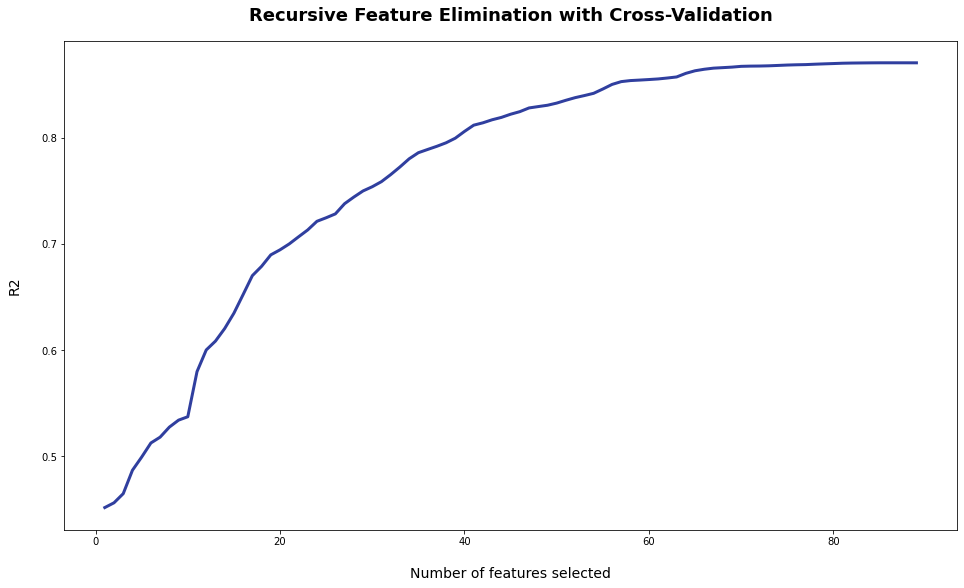

In [147]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('R2', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [148]:
rfecv_predictions = rfecv.predict(X_test)

rfecv_predictions_unscaled = np.exp(rfecv_predictions)
rfecv_predictions_unscaled

predicted_prices_rfecv = pd.DataFrame({"price": test_actual.astype(int), "lr_predicted": rfecv_predictions_unscaled.astype(int)})

predicted_prices_rfecv

,price,lr_predicted
14990,1190000,1274484
7893,474999,279323
8177,452000,506109
15091,2270000,2008780
14188,526500,495419
...,...,...
17617,464000,342736
8594,1330000,965340
7453,499000,405288
15016,348000,344608


In [149]:
mae = round(mean_absolute_error(test_actual, rfecv_predictions_unscaled), 2)
mae

70851.65

In [150]:
models['Models'].append('RFECV')
models['r2'].append(r2)
models['mae'].append(mae)

### Visualizing R2 at different features selected (OLS LR)

>50 0.832 (0.005)
>51 0.835 (0.005)
>52 0.837 (0.005)
>53 0.839 (0.005)
>54 0.842 (0.005)
>55 0.846 (0.005)
>56 0.850 (0.005)
>57 0.853 (0.005)
>58 0.854 (0.005)
>59 0.854 (0.005)
>60 0.855 (0.006)
>61 0.855 (0.006)
>62 0.856 (0.006)
>63 0.857 (0.006)
>64 0.860 (0.006)
>65 0.863 (0.005)
>66 0.864 (0.005)
>67 0.865 (0.005)
>68 0.866 (0.005)
>69 0.866 (0.005)
>70 0.867 (0.005)
>71 0.867 (0.005)
>72 0.867 (0.005)
>73 0.868 (0.005)
>74 0.868 (0.005)
>75 0.868 (0.005)
>76 0.869 (0.005)
>77 0.869 (0.005)
>78 0.869 (0.005)
>79 0.869 (0.005)
>80 0.870 (0.005)
>81 0.870 (0.005)
>82 0.870 (0.005)
>83 0.870 (0.005)
>84 0.870 (0.005)
>85 0.870 (0.005)
>86 0.870 (0.005)
>87 0.870 (0.005)
>88 0.870 (0.005)
>89 0.870 (0.005)
>90 0.870 (0.005)
>91 0.870 (0.005)
>92 0.870 (0.005)
>93 0.870 (0.005)
>94 0.870 (0.005)
>95 0.870 (0.005)


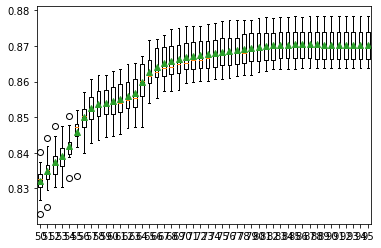

In [151]:
# explore the number of selected features for RFE

# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

# get a list of these_models to evaluate
def get_these_models():
    these_models = dict()
    for i in range(50, 96):
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
        model = LinearRegression()
        these_models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return these_models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

these_models = get_these_models()
# evaluate the these_models and store results
results, names = list(), list()
for name, model in these_models.items():
    scores = evaluate_model(model, X_train_val, y_train_val)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

    # plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Custom LAD Regression Model

Least Absolute Deviations model (uses MAE to optimize model)

In [152]:
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class LADRegression(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        d = X.shape[1]
        mae_loss = lambda coefs: np.mean(np.abs(y - X@coefs[:-1] - coefs[-1]))
        *self.coef_, self.intercept_ = minimize(mae_loss, x0=np.array((d+1)*[0.])).x # the heavy lifting
        
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        return X@self.coef_ + self.intercept_

In [153]:
model = LADRegression()

model.fit(X_train_val, y_train_val)

LADRegression()

In [154]:
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8691469809589627

In [155]:
predictions_LAD = model.predict(X_test)
predictions_LAD_unscaled = np.exp(predictions_LAD)

In [156]:
mae = round(mean_absolute_error(test_actual, predictions_LAD_unscaled), 2)
mae

70461.26

In [157]:
models['Models'].append('LAD Regression')
models['r2'].append(r2)
models['mae'].append(mae)

## SVR

In [158]:
# Linear Support vector regression
from sklearn.svm import SVR

svr = SVR()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
scores = cross_val_score(svr, X_train_val, y_train_val, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
r2 = np.mean(scores)
r2

0.6525866803178711

In [159]:
svr.fit(X_train_val, y_train_val)
predictions_SVR = svr.predict(X_test)
predictions_SVR_unscaled = np.exp(predictions_SVR)

In [160]:
mae = round(mean_absolute_error(test_actual, predictions_SVR_unscaled), 2)
mae

118091.17

In [161]:
models['Models'].append('SVR')
models['r2'].append(r2)
models['mae'].append(mae)

## Elastic Net Regression

In [162]:
# Elastic Net regression

from sklearn.linear_model import ElasticNetCV

elasticnet = ElasticNetCV(cv=5, random_state=0)
elasticnet.fit(X_train_val, y_train_val)
r2 = elasticnet.score(X_train_val, y_train_val)
r2

0.7658172570580378

In [163]:
predictions_elastic = elasticnet.predict(X_test)
predictions_elastic_unscaled = np.exp(predictions_elastic)

In [164]:
mae = round(mean_absolute_error(test_actual, predictions_elastic_unscaled), 2)
mae

98286.91

In [165]:
models['Models'].append('Elastic Net')
models['r2'].append(r2)
models['mae'].append(mae)

## Lasso Regression

In [166]:
# Lasso regression

from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_train_val, y_train_val)
r2 = lasso.score(X_train_val, y_train_val)
r2

0.7820505489096635

In [167]:
predictions_lasso = lasso.predict(X_test)
predictions_lasso_unscaled = np.exp(predictions_lasso)

In [168]:
mae = round(mean_absolute_error(test_actual, predictions_lasso_unscaled), 2)
mae

93832.09

In [169]:
models['Models'].append('Lasso')
models['r2'].append(r2)
models['mae'].append(mae)

## Regression Results

In [170]:
model_types = pd.DataFrame(models)

In [171]:
model_types.sort_values('mae', ascending=True)

,Models,r2,mae
4,LAD Regression,0.869147,70461.26
3,RFECV,0.870395,70851.65
0,Basic LR,0.870378,70868.43
1,Forw-Back Selector,0.870348,70922.41
2,Permutation Importance,0.869905,71062.03
7,Lasso,0.782051,93832.09
6,Elastic Net,0.765817,98286.91
5,SVR,0.652587,118091.17


In [172]:
break

SyntaxError: 'break' outside loop (<ipython-input-172-6aaf1f276005>, line 1)

# Polynomial stuff

In [ ]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
X_train_poly = X_train_val['sqft_living']
X_train_poly = X_train_poly.values.reshape(-1, 1)
y_train_poly = y_train_val

X_test_poly = X_test['sqft_living']
X_test_poly = X_test_poly.values.reshape(-1, 1)
y_test_poly = y_test

In [ ]:


# fit multiple polynomial features
degrees = [1, 2, 3, 6]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train_poly), len(degrees)))
y_test_pred = np.zeros((len(X_test_poly), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.exp(model.predict(X_train_poly))
    y_test_pred[:, i] = np.exp(model.predict(X_test_poly))

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train_poly, np.exp(y_train_poly))
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train_poly, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test_poly, np.exp(y_test_poly))
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test_poly, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# compare r2 for train and test sets (for all polynomial fits)
print("Mean absolute error: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(mean_absolute_error(np.exp(y_train_poly), y_train_pred[:, i]), 2)
    test_r2 = round(mean_absolute_error(np.exp(y_test_poly), y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

In [ ]:
df_bins

In [ ]:
X_now = df_bins['zip_group'].astype(int)
X_now = np.log(X_now)
X_now

In [ ]:
# creating our train/validation sets and our test sets

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_now, y, test_size=0.2)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
X_train_poly = np.array(X_train_poly)
X_train_poly = X_train_poly.reshape(-1, 1)
X_test_poly = np.array(X_test_poly)
X_test_poly = X_test_poly.reshape(-1, 1)

In [ ]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train_poly), len(degrees)))
y_test_pred = np.zeros((len(X_test_poly), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.exp(model.predict(X_train_poly))
    y_test_pred[:, i] = np.exp(model.predict(X_test_poly))

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train_poly, np.exp(y_train_poly))
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train_poly, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test_poly, np.exp(y_test_poly))
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test_poly, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# compare r2 for train and test sets (for all polynomial fits)
print("Mean absolute error: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(mean_absolute_error(np.exp(y_train_poly), y_train_pred[:, i]), 2)
    test_r2 = round(mean_absolute_error(np.exp(y_test_poly), y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train_poly)

In [ ]:
x_poly

In [ ]:
stuff = pd.DataFrame(x_poly)
stuff

# Comps "Model"

In [ ]:
df_comps = df[['lat', 'long', 'price', 'sqft_living', 'sqft_lot', 'bedrooms', 'condition']]
df_comps

In [ ]:
df_comps.describe()

In [ ]:
dataset = list(zip(df_comps['lat'],df_comps['long']))
df_comps['coordinates'] = dataset
df_comps['comps_est'] = np.NaN
df_comps.reset_index(inplace=True, drop=True)
df_comps

In [ ]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=df_comps, x="long", y="lat", hue="price", palette="viridis_r");

Generate comps

* Generate a sq footage % range
* Generate a lot size % range
* Decide if +/- 1 bedroom is acceptable
* Decide if +/- 1 condition is acceptable


* For KNN:
    * For each entry:
    * establish comp requirements
    * create comp dataframe
    * determine neighborhood inclusion zone using within reasonable lat/long
    * create check dataframe which only includes entries within the inclusion zone
    * make sure there are at least x entries available. If not, increase inclusion zone.
    * calculate euclidian distance against all entries in inclusion zone
    * store euclidian distance to dataframe column for local zone
    * accept top x entries by euclidian distance


## Function

In [ ]:
def inclusion_zone(base_property, housing_set):
    lat = base_property['lat']
    long = base_property['long']
    eligible_zone = housing_set.loc[(housing_set['lat'] >= (lat-latrange)) & 
                                        (housing_set['lat'] <= (lat+latrange))&
                                      (housing_set['long'] >= (long-longrange)) & 
                                       (housing_set['long'] <= (long+longrange))]
    return eligible_zone

def find_comps(base_property, housing_set, bedrooms, condition):
    eligible_zone = inclusion_zone(base_property, housing_set)
    price = base_property['price']
    sqft = base_property['sqft_living']
    lot = base_property['sqft_lot']
    
    eligible_homes = eligible_zone.loc[(eligible_zone['price'] >= (price*(1-pricerange))) & 
                                    (eligible_zone['price'] <= (price*(1+pricerange))) &
                                  (eligible_zone['sqft_living'] >= (sqft*(1-sqftrange))) & 
                                   (eligible_zone['sqft_living'] <= (sqft*(1+sqftrange))) &
                                  (eligible_zone['sqft_lot'] >= (lot*(1-lotrange))) & 
                                   (eligible_zone['sqft_lot'] <= (lot*(1+lotrange))) &
                                  (eligible_zone['bedrooms'] >= (bedrooms-(1+bedmod))) & 
                                   (eligible_zone['bedrooms'] <= (bedrooms+(1+bedmod))) &
                                  (eligible_zone['condition'] >= (condition-(1+condmod))) & 
                                   (eligible_zone['condition'] <= (condition + (1+condmod)))]
    return eligible_homes


from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def comp_value(base_property, housing_set):
    bedrooms = base_property['bedrooms']
    condition = base_property['condition']
    start_coordinates = base_property['coordinates']
    eligible_homes = find_comps(base_property, housing_set, bedrooms, condition)
    #eligible_homes = eligible_homes.drop([base_property.name], axis=0)
    if eligible_homes.shape[0] >= 11:
        eligible_homes['distance'] = eligible_homes['coordinates'].apply(lambda x: euclidean_distance(start_coordinates, x))
        eligible_homes = eligible_homes.sort_values('distance', ascending=True)
        current_index = base_property.name
        comps = eligible_homes.iloc[:6]
        comp_value = round(np.mean(comps['price']), 0)
        return comp_value
    else:
        return np.nan
    

## Comps Model

In [ ]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
actual = np.exp(y_test)

In [ ]:
compsfinder = df.loc[X_train.index]
dataset = list(zip(compsfinder['lat'],compsfinder['long']))
compsfinder['coordinates'] = dataset

getcomps = df.loc[X_test.index]
dataset = list(zip(getcomps['lat'],getcomps['long']))
getcomps['coordinates'] = dataset
getcomps['comps_est'] = np.NaN
getcomps


### TO DO:

* Run multiple variations of changes to hyperparameters looking for the most accurate params way to capture comps effectively


In [ ]:
getcomps['comps_est'].isna().sum()

In [ ]:
latrange = .05
longrange = .05
pricerange = .1
sqftrange = .1
lotrange = .5
bedmod = 0
condmod = 0

while getcomps.isna().sum()['comps_est'] != 0:
    getcomps.loc[getcomps.comps_est.isna(), 'comps_est'] = getcomps.loc[getcomps.comps_est.isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)
    latrange += .005
    longrange += .005
    pricerange += .01
    sqftrange += .01
    lotrange += .05
    bedmod += .2
    condmod += .2


In [ ]:
getcomps.isna().sum()['comps_est']

In [ ]:
getcomps

In [ ]:
predicted = pd.concat([predicted_prices, getcomps['comps_est']], axis=1, join="inner")
predicted

In [ ]:
comps_predictions = predicted['comps_est']

In [ ]:
round(mean_absolute_error(actual, comps_predictions), 2)

In [ ]:
#predicted_prices['Abs_Diff'] = abs(predicted_prices.Actual - predicted_prices.Predicted)

## Comps with CV and GridSearch

In [ ]:
# Once I have my custom estimator built, this will work :)

params = {'latrange':[.005,.1,.2], 'longrange':[.005,.1,.2], 'sqftrange':[.0025,.005,.01,.015], 'lotrange':[.005,.01,.015,.02], 'bedmod':[.1,.2,.3], 'condmod':[.1,.2,.3] }

custom_function = comp_value()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = GridSearchCV(custom_function, params, cv=cv)

model.fit(x_train,y_train)
model.best_params_

## Test Dataframe

In [ ]:
# make small test dataframe

#df_comps_test = df_comps

df_comps_test = df_comps.iloc[:5000]
df_comps_test

In [ ]:
test_property = df_comps_test.iloc[0]

test = comp_value(test_property, df_comps_test)
test


In [ ]:
df_comps_test['comps_est'] = df_comps_test.apply(lambda x: comp_value(x, df_comps_test), axis=1)

In [ ]:
df_comps_test

In [ ]:
df_comps_test.isna().sum()

In [ ]:
latrange = .08
longrange = .08
pricerange = .1
sqftrange = .1
lotrange = .5

df_comps_test.loc[df_comps_test.comps_est.isna(), 'comps_est'] = df_comps_test.loc[df_comps_test.comps_est.isna()].apply(lambda x: comp_value(x, df_comps_test), axis=1)

In [ ]:
df_comps_test.isna().sum()

## Main Dataframe

In [ ]:
df_comps

In [ ]:
df_comps.isna().sum()

In [ ]:
latrange = .08
longrange = .08
pricerange = .1
sqftrange = .1
lotrange = .5

while df_comps.isna().sum != 0:
    df_comps.loc[df_comps.comps_est.isna(), 'comps_est'] = df_comps.loc[df_comps.comps_est.isna()].apply(lambda x: comp_value(x, df_comps), axis=1)
    latrange += .01
    longrange += .01
    pricerange += .05
    sqftrange += .05
    lotrange += .05
    
# this has a problem - needs to be manually broken because there is ONE house in the dataset that cannot comply    

In [ ]:
df_comps.isna().sum()

In [ ]:
df_comps_log = df_comps['comps_est']
df_comps_log

df_comps_log = np.array(np.log(df_comps_log))
df_comps_log.reshape(-1,1)
df_comps_log.shape





from sklearn.preprocessing import scale
df_comps_transformed = pd.DataFrame(scale(df_comps_log))
df_comps_transformed
#scaler = StandardScaler()
#scaler.fit(df_comps_log)
#df_comps_transformed = pd.DataFrame(scaler.transform(df_comps_log))

In [ ]:
df_comps_transformed

In [ ]:
break

# TO DO


Visuals:
* zip code map
* Visualize R2 errors 



### Study Residuals

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "floors", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "renovated_1.0", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "basement_1.0", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "waterfront_1.0", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "view_1.0", fig=fig)
plt.show()

In [ ]:
import scipy.stats as stats

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# Stuff I'm not using

THIS IS MODEL building and diagnosis problem, there are many way to do it, according your statement I think the following will be easy. Assume the dependent variable is continuous and normal distributed as you stated
1.       Check the type of co factors, if some have a lot of missing value or typo, correct them or let them out. Then for continuous factors, check the person correlation coefficients,  if Pearson correlation near 1 or -1 among any two, one should be gone in multiple regression. For category factors, check independency of any two. if most count appear in the diagonal of the contingence table, one of the two category variables should be gone.
2.       Draw the scatter plots between the continuous outcome and each independent quantitative factor to see the association: if linear trend is shown, the factor is in, if non-linear effect is shown, transformation is needed. If no trend, like random, the independent factor could be out.
3.       Suppose the dependent variable should be independent. If the dependent variable is related to time, check the auto correlation, if autocorrelation exists,  time series modeling say Autoreg might be used.
4.       Do PCA analysis to see if there are still multicolinearity among the independent factors, if some eigen-value is near zero, you may drop one of them, or define a new factor (transformation) .
5.       If the sample size is large enough, say 10 (at least) times higher of the unknown parameter number, you can  do multiple regressions, you may use auto select option, such as forward backward or best, which will select independent factors for you.
6.       Number of parameters: interception: count 1, continuous factor, each counts 1, categorical factor with level of k, count as k-1.
7.       Check outliers by leverage or CooksD or Residual, if exists you may delete them or do both model with and without the outliers.
8.       Check normality of residuals from the multi variable regression,    if violated, do transformation, variance homogeneity exist: transformation on some independent factor, variance homogeneity doesn’t exist: transformation on dependent factor. Those may improve your model fitting.
9.       You may use Akaike’s information criterion or Bayesian information criterion or Mallows’ CP to decide how many factors should be in. Using them is better than comparison of  R2.
10.   Check interaction among the independent factors, the interaction among two quantitative predictors, means there is joint effect; the effect of one factor varies across the level of another factor. If the interaction between an quantitation factor and a category factor, say gender, it means the effect of the quantitative, slope,  is different between males and females.

## IQR outlier removal

In [ ]:
# preparing our outlier detection function

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - 1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

# KNN Model

In [ ]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 


In [ ]:
rmse_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    
    # set up the KNN regressor
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_val, y_train_val)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 9)
model.fit(X_train_val, y_train_val)  #fit the model
pred_knn = model.predict(X_test) #make prediction on test set
pred_knn = np.exp(pred_knn)

In [ ]:
round(mean_absolute_error(test_actual, pred_knn), 2)

# Decision Tree Model

### Data Prep - Decision Tree

Tree regressors are insensitive to feature scaling. We will build a data set for tree regressors that has our data un-scaled and unaltered.

There are a few occasions when it’s better to one-hot encode variables into k variables instead of k-1:
* When building tree-based algorithms.
* When making feature selection with recursive algorithms.
* When interested in determining the importance of every single category

In [ ]:
# no drop version for tree algorithms
processed_bins_nodrop = pd.get_dummies(df_bins[dummybins], prefix=dummybins)

In [ ]:
preprocessed_trees = pd.concat([df_target, df_discrete, df_continuous, processed_bins_nodrop, processed_cats], axis=1)

In [ ]:
# preprocessed data ready for tree-based algorithm

preprocessed_trees

### Experimenting with tree depths

In [ ]:
X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_4 = DecisionTreeRegressor(max_depth=20)
regr_5 = DecisionTreeRegressor(max_depth=30)
regr_6 = DecisionTreeRegressor(max_depth=50)


regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)
regr_5.fit(X_train, y_train)

regr_6.fit(X_train, y_train)

In [ ]:
predicted_2 = regr_1.predict(X_test)
predicted_5 = regr_2.predict(X_test)
predicted_10 = regr_3.predict(X_test)
predicted_20 = regr_4.predict(X_test)
predicted_30 = regr_5.predict(X_test)
predicted_50 = regr_6.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted_2": predicted_2, "Predicted_5": predicted_5, "Predicted_10": predicted_10, "Predicted_20": predicted_20, "Predicted_30": predicted_30, "Predicted_500": predicted_50})
predicted_prices


In [ ]:

round(mean_absolute_error(actual, predicted_2), 2), round(mean_absolute_error(actual, predicted_5), 2), round(mean_absolute_error(actual, predicted_10), 2), round(mean_absolute_error(actual, predicted_20), 2), round(mean_absolute_error(actual, predicted_30), 2), round(mean_absolute_error(actual, predicted_50), 2)

A tree depth somewhere in the middle gives us the best result

### To Do - 

write function that incorporates all of our learned things into one decision tree function that both looks for the best combo of features, and looks at different tree depth, and returns these for the model.

### DecisionTreeRegressor identifying feature importance without CV

Now we are studying our feature importance using a Decision Tree model. Decision trees support non-linearity, and are good when there are a lot of categorical variables. This output tells us the features that have the most weight in a Decision Tree algorithm.

The model gives us a list of important features based on how much they influenced the decision tree accuracy.

In [ ]:
# We need to use our tree algorithm data sets for this algorithm. Tree algorithms are not sensitive to feature scaling,
# and do not need to be log transformed or normalizd

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

In [ ]:
# create the random forest with your hyperparameters.
model = DecisionTreeRegressor()

# fit the model to start training.
model.fit(X_train, y_train)

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": X.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances', ascending=False)


final_df

Model prediction without CV with Decision Tree as our algorithm

In [ ]:
predicted_home_prices = model.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

### Recursive Feature Elimination with Cross Validation - Decision Tree

In [ ]:
# We need to use our tree algorithm data sets for this algorithm. Tree algorithms are not sensitive to feature scaling,
# and do not need to be log transformed or normalizd

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

In [ ]:
# picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

model = DecisionTreeRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='neg_mean_absolute_error')

rfecv.fit(X_train, y_train)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('MAE', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

imp_values = dset[(dset['used'] == True)]
imp_values['importance'] = rfecv.estimator_.feature_importances_
imp_values = imp_values.sort_values(by='importance', ascending=False)
imp_values

plt.figure(figsize=(16, 14))
plt.barh(y=imp_values['attr'], width=imp_values['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
predicted_home_prices = rfecv.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

### Visualising MAE at different features selected

In [ ]:
# prepare tree regression data set

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

In [ ]:
# explore the number of selected features for RFE

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(6, 37):
        rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
        model = DecisionTreeRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
model = DecisionTreeRegressor()
rfe = RFE(estimator=model, n_features_to_select=30)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rfe, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

rfe.fit(X_train, y_train)

print(np.mean(scores))


In [ ]:
predicted_home_prices = rfe.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

## Boosted Model

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train_val.columns = [regex.sub("", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train_val.columns.values]

X_test.columns = [regex.sub("", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [ ]:
import xgboost as xgb

the_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)


#the_model = xgb.XGBRegressor()
the_model.fit(X_train_val, y_train_val)

In [ ]:
predicted_home_prices = np.floor(np.expm1(the_model.predict(X_test)))

In [ ]:
predicted_prices = pd.DataFrame({"Actual": test_actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(test_actual, predicted_home_prices), 2)

### Later?
Gradient Boosting

In [ ]:
# prepare tree regression data set

X = preprocessed_trees.iloc[:1000]['sqft_living']
y = preprocessed_trees.iloc[:1000]['price']

X = np.array(X)
X = X.reshape(-1, 1)

X.shape
y.shape

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(15, 4))
plt.scatter(X, y, alpha=.7);

In [ ]:
def many_trees(n_trees, clf=False, **kwargs):
    trees = [DecisionTreeRegressor(**kwargs) for i in range(n_trees)]
    return trees

def boost(trees, X, y):
    fitted = []
    for tree in trees:
        tree.fit(X, y)
        yhat = tree.predict(X)
        y = (y-yhat) 
        fitted.append(tree)
    return fitted
        
def predict(trees, X):
    return np.array([tree.predict(X) for tree in trees])

In [ ]:
samples = X.shape[0]

learners = many_trees(samples, max_depth=1)
fitted = boost(learners, X, y)
boosted_yhat = predict(fitted, X)

xfit = np.linspace(0, 10, samples).reshape(-1, 1)

sample_ix = np.arange(X.shape[0])

def plot_fits(n_trees, row):
    preds_t = boosted_yhat[:, :n_trees]
    boosted_pred = preds_t.sum(1)
    res = boosted_pred-y
    axes[row, 0].plot(xfit, boosted_pred, c='red')
    axes[row, 0].scatter(X, y)
    axes[row, 0].set_title(f"Fit after {n_trees} trees", fontsize=15)
    axes[row, 1].scatter(sample_ix, res, alpha=0.7)
    axes[row, 1].plot(res, color='r', alpha=0.7)
    axes[row, 1].set_title(f"Residuals after {n_trees} trees", fontsize=15)

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,25))
plot_fits(1, 0)
plot_fits(5, 1)
plot_fits(15, 2)
plot_fits(20, 3)
plot_fits(25, 4)
plot_fits(30, 5)

fig.tight_layout()

In [ ]:
plt.figure(figsize=(15, 4))

pred = 0
for i in range(len(learners)):
    pred += boosted_yhat[:, i]
    plt.plot(xfit, pred)
plt.plot(xfit, predict(learners, X).sum(1))
plt.xlabel("X")
plt.ylabel("y");

plt.scatter(X, y, alpha=.4);

reference: https://towardsdatascience.com/gradient-boosting-is-one-of-the-most-effective-ml-techniques-out-there-af6bfd0df342

# TO DO POLYNOMIAL

Test if any of the variables have a diff polynomial relationship to price


In [ ]:
pred = linreg.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test, pred)
MSE

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = linreg.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = linreg.fit(X_train3, y_train)
print(mean_squared_error(y_test, model.predict(X_test3)))

# Future Work

Increase granularity using latitude and longitude

Use Lat and Long with google API to reverse lookup address
Enter address into GreatSchools.org with web scraper, get back school name and rating for elementary, middle, high
Store school name and rating for each row
Average out elementary, middle and high for an average school score for the property (possible determine weights on elementary, middle, high school scores)

In tool:
When zip code is entered, give all schools for zip code and allow a selection
If Unknown is selected for one or more schools, use average for that zip code for the school type
If a school is missing, advise that metrics can be improved with accurate info and direct to GreatSchools

Walkability metric:

Use Lat and Long with google API to reverse lookup address
Look up property on redfin
Scrape walkability score